# Análise Exploratória dos Dados (EDA) 

In [2]:
# importamos as libs
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split

from scipy.stats import pearsonr
from collections import Counter

In [3]:
PATH="https://raw.githubusercontent.com/LeiteJu/TCC/main/dados/input/"

ESTADOS=['ACRE', 'ALAGOAS', 'AMAZONAS', 'AMAPÁ', 'BAHIA', ' CEARÁ',
         'DISTRITO FEDERAL', 'ESPÍRITO SANTO', 'GOIÁS', 'MARANHÃO', 'MINAS GERAIS', 'MATO GROSSO DO SUL', 
         'MATO GROSSO', 'PARÁ', 'PARAÍBA', 'PERNAMBUCO', 'PIAUÍ', 'PARANÁ',
         'RIO DE JANEIRO', 'RIO GRANDE DO NORTE', 'RONDÔNIA',  'RORAIMA', 'RIO GRANDE DO SUL', 'SANTA CATARINA', 
         'SERGIPE', 'SÃO PAULO', 'TOCANTINS', 'CEARÁ']

SIGLAS = ["AC","AL","AM","AP","BA","CE",
          "DF","ES","GO","MA","MG","MS",
          "MT","PA","PB","PE","PI","PR",
          "RJ","RN","RO","RR","RS","SC",
          "SE","SP","TO", 'CE']

MAP = dict(zip(ESTADOS, SIGLAS))

N='NORTE'
NE="NORDESTE"
CO='CENTRO OESTE'
SE='SUDESTE'
S = 'SUL'

REGIOES = {
    'AC': N, 'AL': NE, 'AM' : N, 'AP' : N, 'BA' : NE, 'CE' : NE,
    'DF' : CO, 'ES' : SE, 'GO' : CO, 'MA' : NE,
    'MG' : SE, 'MS' : CO, 'MT' : CO, 'PA' : N, 'PB' : NE,
    'PE' : NE, 'PI' : NE, 'PR' : S, 'RJ' : SE,
    'RN' : NE, 'RO' : N, 'RR' : N, 'RS' : S,
    'SC' : S, 'SE' : NE, 'SP' : SE, 'TO' : N}

In [4]:
df = pd.read_csv(f"{PATH}df.csv")

In [5]:
df.head()

estados        data         pib_pc        pib_pmc  pib_pcpt         pib_cc  \
0      AC  2003-01-01  434223.352964  228569.188542  0.739806  506500.171013   
1      AC  2003-02-01  434223.352964  228569.188542  0.739806  506500.171013   
2      AC  2003-03-01  434223.352964  228569.188542  0.739806  506500.171013   
3      AC  2003-04-01  434223.352964  228569.188542  0.739806  506500.171013   
4      AC  2003-05-01  434223.352964  228569.188542  0.739806  506500.171013   

   populacao  incc   ipca   igp  ...  idh_r  idh_e  nfsp       estoque  \
0   586942.0  1.70  12.53  2.70  ...  0.612  0.325  3.46  6.098524e+06   
1   586942.0  1.51   2.25  2.17  ...  0.612  0.325  3.59  6.172460e+06   
2   586942.0  1.39   3.86  1.59  ...  0.612  0.325  3.84  6.172460e+06   
3   586942.0  1.38   5.13  1.66  ...  0.612  0.325  3.95  6.172460e+06   
4   586942.0  0.90   6.15  0.41  ...  0.612  0.325  4.06  6.172460e+06   

   desemprego  producao  preco_ton  preco_saco  preco_kg  consumo  
0    6.582788      -1.0       -1.0        -1.0      -1.0   3260.0  
1    6.582788      -1.0       -1.0        -1.0      -1.0   2191.0  
2    6.582788      -1.0       -1.0        -1.0      -1.0   2154.0  
3    6.582788   34655.0       -1.0        -1.0      -1.0   2643.0  
4    6.582788  172597.0       -1.0        -1.0      -1.0   2546.0  

[5 rows x 22 columns]

In [6]:
# -1 foi usado para substituir valores nulos, vamos remover para ser verídico na análise
df = df.replace(-1.0, np.nan)

In [7]:
df['regiao'] = df['estados'].apply(lambda x : REGIOES[x])

In [8]:
df['data']=pd.to_datetime(df['data'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5508 entries, 0 to 5507
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   estados     5508 non-null   object        
 1   data        5508 non-null   datetime64[ns]
 2   pib_pc      5508 non-null   float64       
 3   pib_pmc     5508 non-null   float64       
 4   pib_pcpt    5508 non-null   float64       
 5   pib_cc      5508 non-null   float64       
 6   populacao   5508 non-null   float64       
 7   incc        5508 non-null   float64       
 8   ipca        5508 non-null   float64       
 9   igp         5508 non-null   float64       
 10  selic       5508 non-null   float64       
 11  idh_l       5508 non-null   float64       
 12  idh_r       5508 non-null   float64       
 13  idh_e       5508 non-null   float64       
 14  nfsp        5508 non-null   float64       
 15  estoque     5508 non-null   float64       
 16  desemprego  5304 non-nul

In [10]:
pd.options.display.float_format = '{:.2f}'.format
df.describe().T

count        mean         std        min        25%        50%  \
pib_pc     5508.00  9706245.92 16462969.63  333924.72 1878044.38 4247143.36   
pib_pmc    5508.00 10710483.70 19936010.79  184806.10 1746413.15 4189313.48   
pib_pcpt   5508.00        1.16        0.64       0.34       0.72       0.99   
pib_cc     5508.00  6211586.68  9793124.52  180024.16 1426863.95 2926014.89   
populacao  5508.00  7138747.24  8403726.15  346871.00 2383784.00 3595886.00   
incc       5508.00        0.58        0.52      -0.25       0.23       0.42   
ipca       5508.00        3.40        2.16       0.29       1.77       3.09   
igp        5508.00        0.51        0.64      -1.24       0.10       0.46   
selic      5508.00        0.05        0.02       0.02       0.03       0.04   
idh_l      5508.00        0.77        0.06       0.65       0.72       0.78   
idh_r      5508.00        0.68        0.07       0.53       0.64       0.68   
idh_e      5508.00        0.55        0.15       0.28       0.42       0.58   
nfsp       5508.00        1.00        0.74      -0.07       0.61       0.84   
estoque    5508.00  7085911.80   605446.91 6098524.42 6529451.69 7102235.54   
desemprego 5304.00        9.31        2.54       3.14       7.22       8.71   
producao   3860.00   179917.21   232241.55    1653.00   50674.00  103572.00   
preco_ton  4234.00      158.94       50.89      65.97     118.40     152.50   
preco_saco 4234.00       19.27        4.52       7.50      16.50      18.50   
preco_kg   4234.00        0.39        0.09       0.15       0.33       0.37   
consumo    5508.00   157867.50   209223.41    1466.00   41359.00   83953.50   

                   75%          max  
pib_pc      9997781.55  95460313.88  
pib_pmc    10402360.77 154399741.44  
pib_pcpt          1.43         3.89  
pib_cc      6749842.91  63516179.29  
populacao   8842791.00  45538936.00  
incc              0.75         2.94  
ipca              4.57        12.53  
igp               0.92         2.70  
selic             0.05         0.09  
idh_l             0.81         0.89  
idh_r             0.72         0.86  
idh_e             0.68         0.84  
nfsp              1.22         4.06  
estoque     7751228.17   7827728.37  
desemprego       11.63        20.54  
producao     194358.25   1553703.00  
preco_ton       187.51       361.31  
preco_saco       21.91        35.50  
preco_kg          0.44         0.71  
consumo      198982.00   1491696.00

In [186]:
(df.isna().sum()/df.shape[0] * 100).sort_values(ascending=False).to_frame(
    name="Missing (%)"
).style.background_gradient(cmap="Reds")

In [187]:
corr_matrix = df.corr(method="pearson").abs()

sol = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
    .stack()
    .sort_values(ascending=False)
)

sol[sol >= 0.70]

C:\Users\julia\AppData\Local\Temp\ipykernel_11344\846124379.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


preco_saco  preco_kg    1.00
pib_pc      pib_cc      0.98
pib_cc      consumo     0.95
pib_pc      populacao   0.95
populacao   consumo     0.94
pib_pc      consumo     0.94
pib_cc      populacao   0.94
pib_pc      pib_pmc     0.94
pib_pmc     pib_cc      0.91
idh_l       idh_e       0.89
pib_pmc     populacao   0.88
            consumo     0.86
idh_l       idh_r       0.85
pib_pcpt    idh_r       0.85
idh_e       estoque     0.82
idh_r       idh_e       0.75
dtype: float64

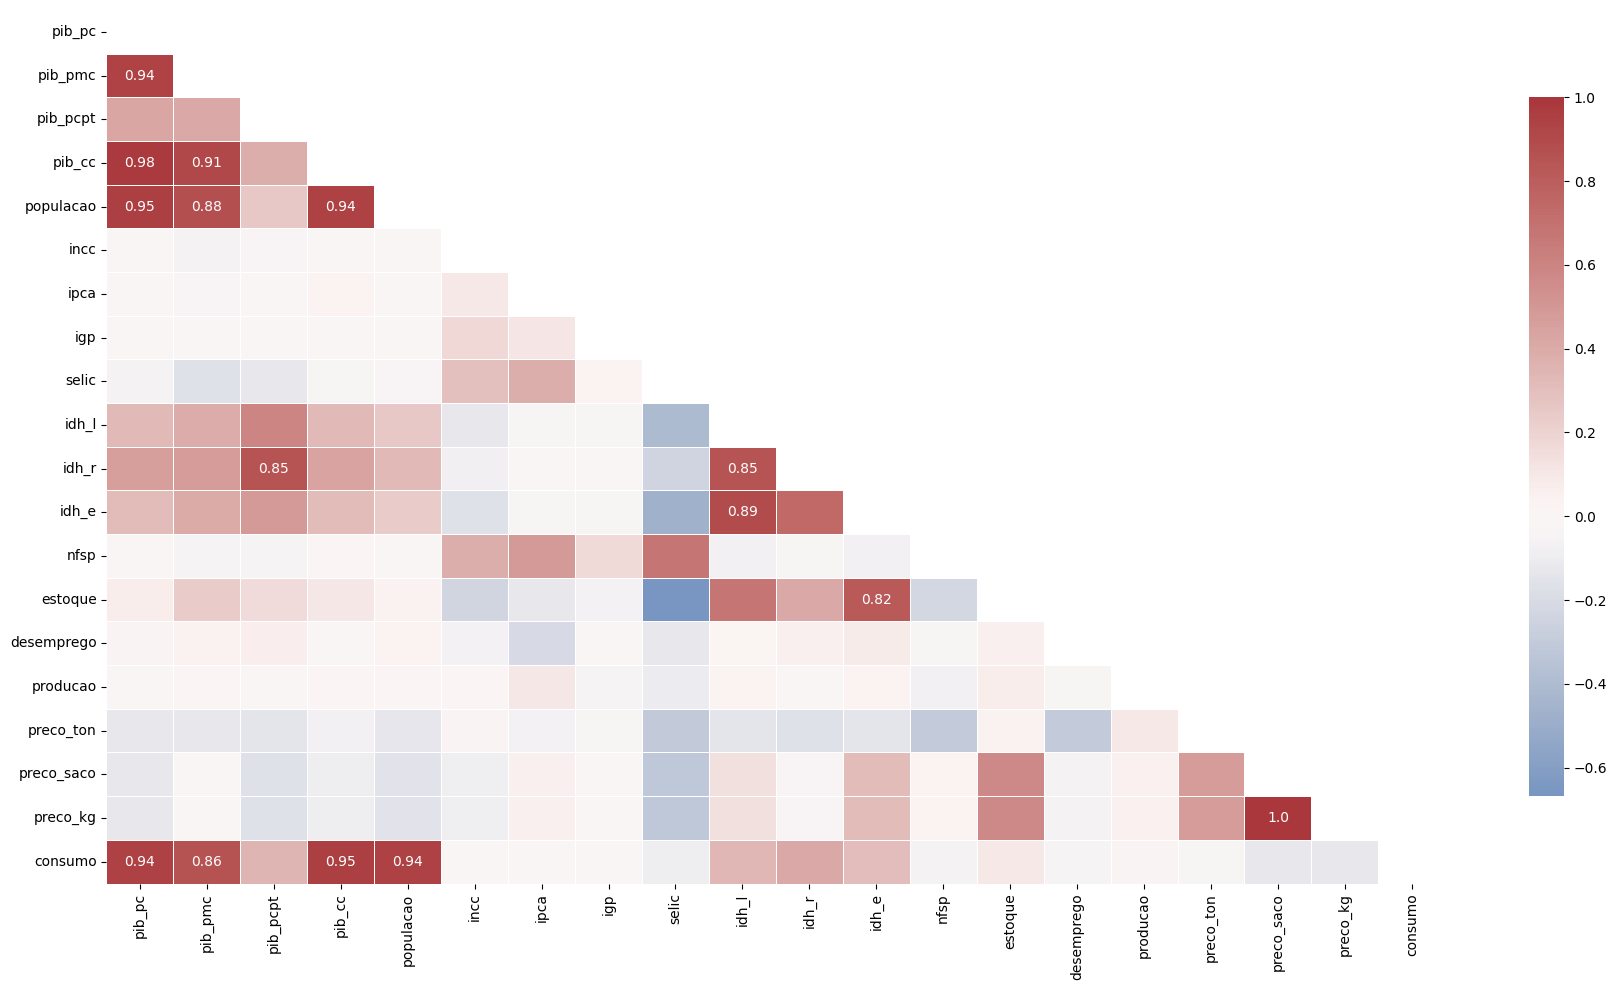

In [188]:
df_corr = df.corr(method="pearson")

labels = np.where(
    np.abs(df_corr) >= 0.75, np.round(df_corr[np.abs(df_corr) > 0.75], 2), ""
)

# plt.figure(figsize=(17, 13))
fig, ax = plt.subplots(figsize=(18, 10))

sns.heatmap(
    df_corr,
    mask=np.triu(np.ones_like(df_corr, dtype=bool)),
    square=False,
    center=0,
    annot=labels,
    fmt="",
    linewidths=0.5,
    cmap="vlag",
    cbar_kws={"shrink": 0.8},
    ax=ax,
)

plt.tight_layout()

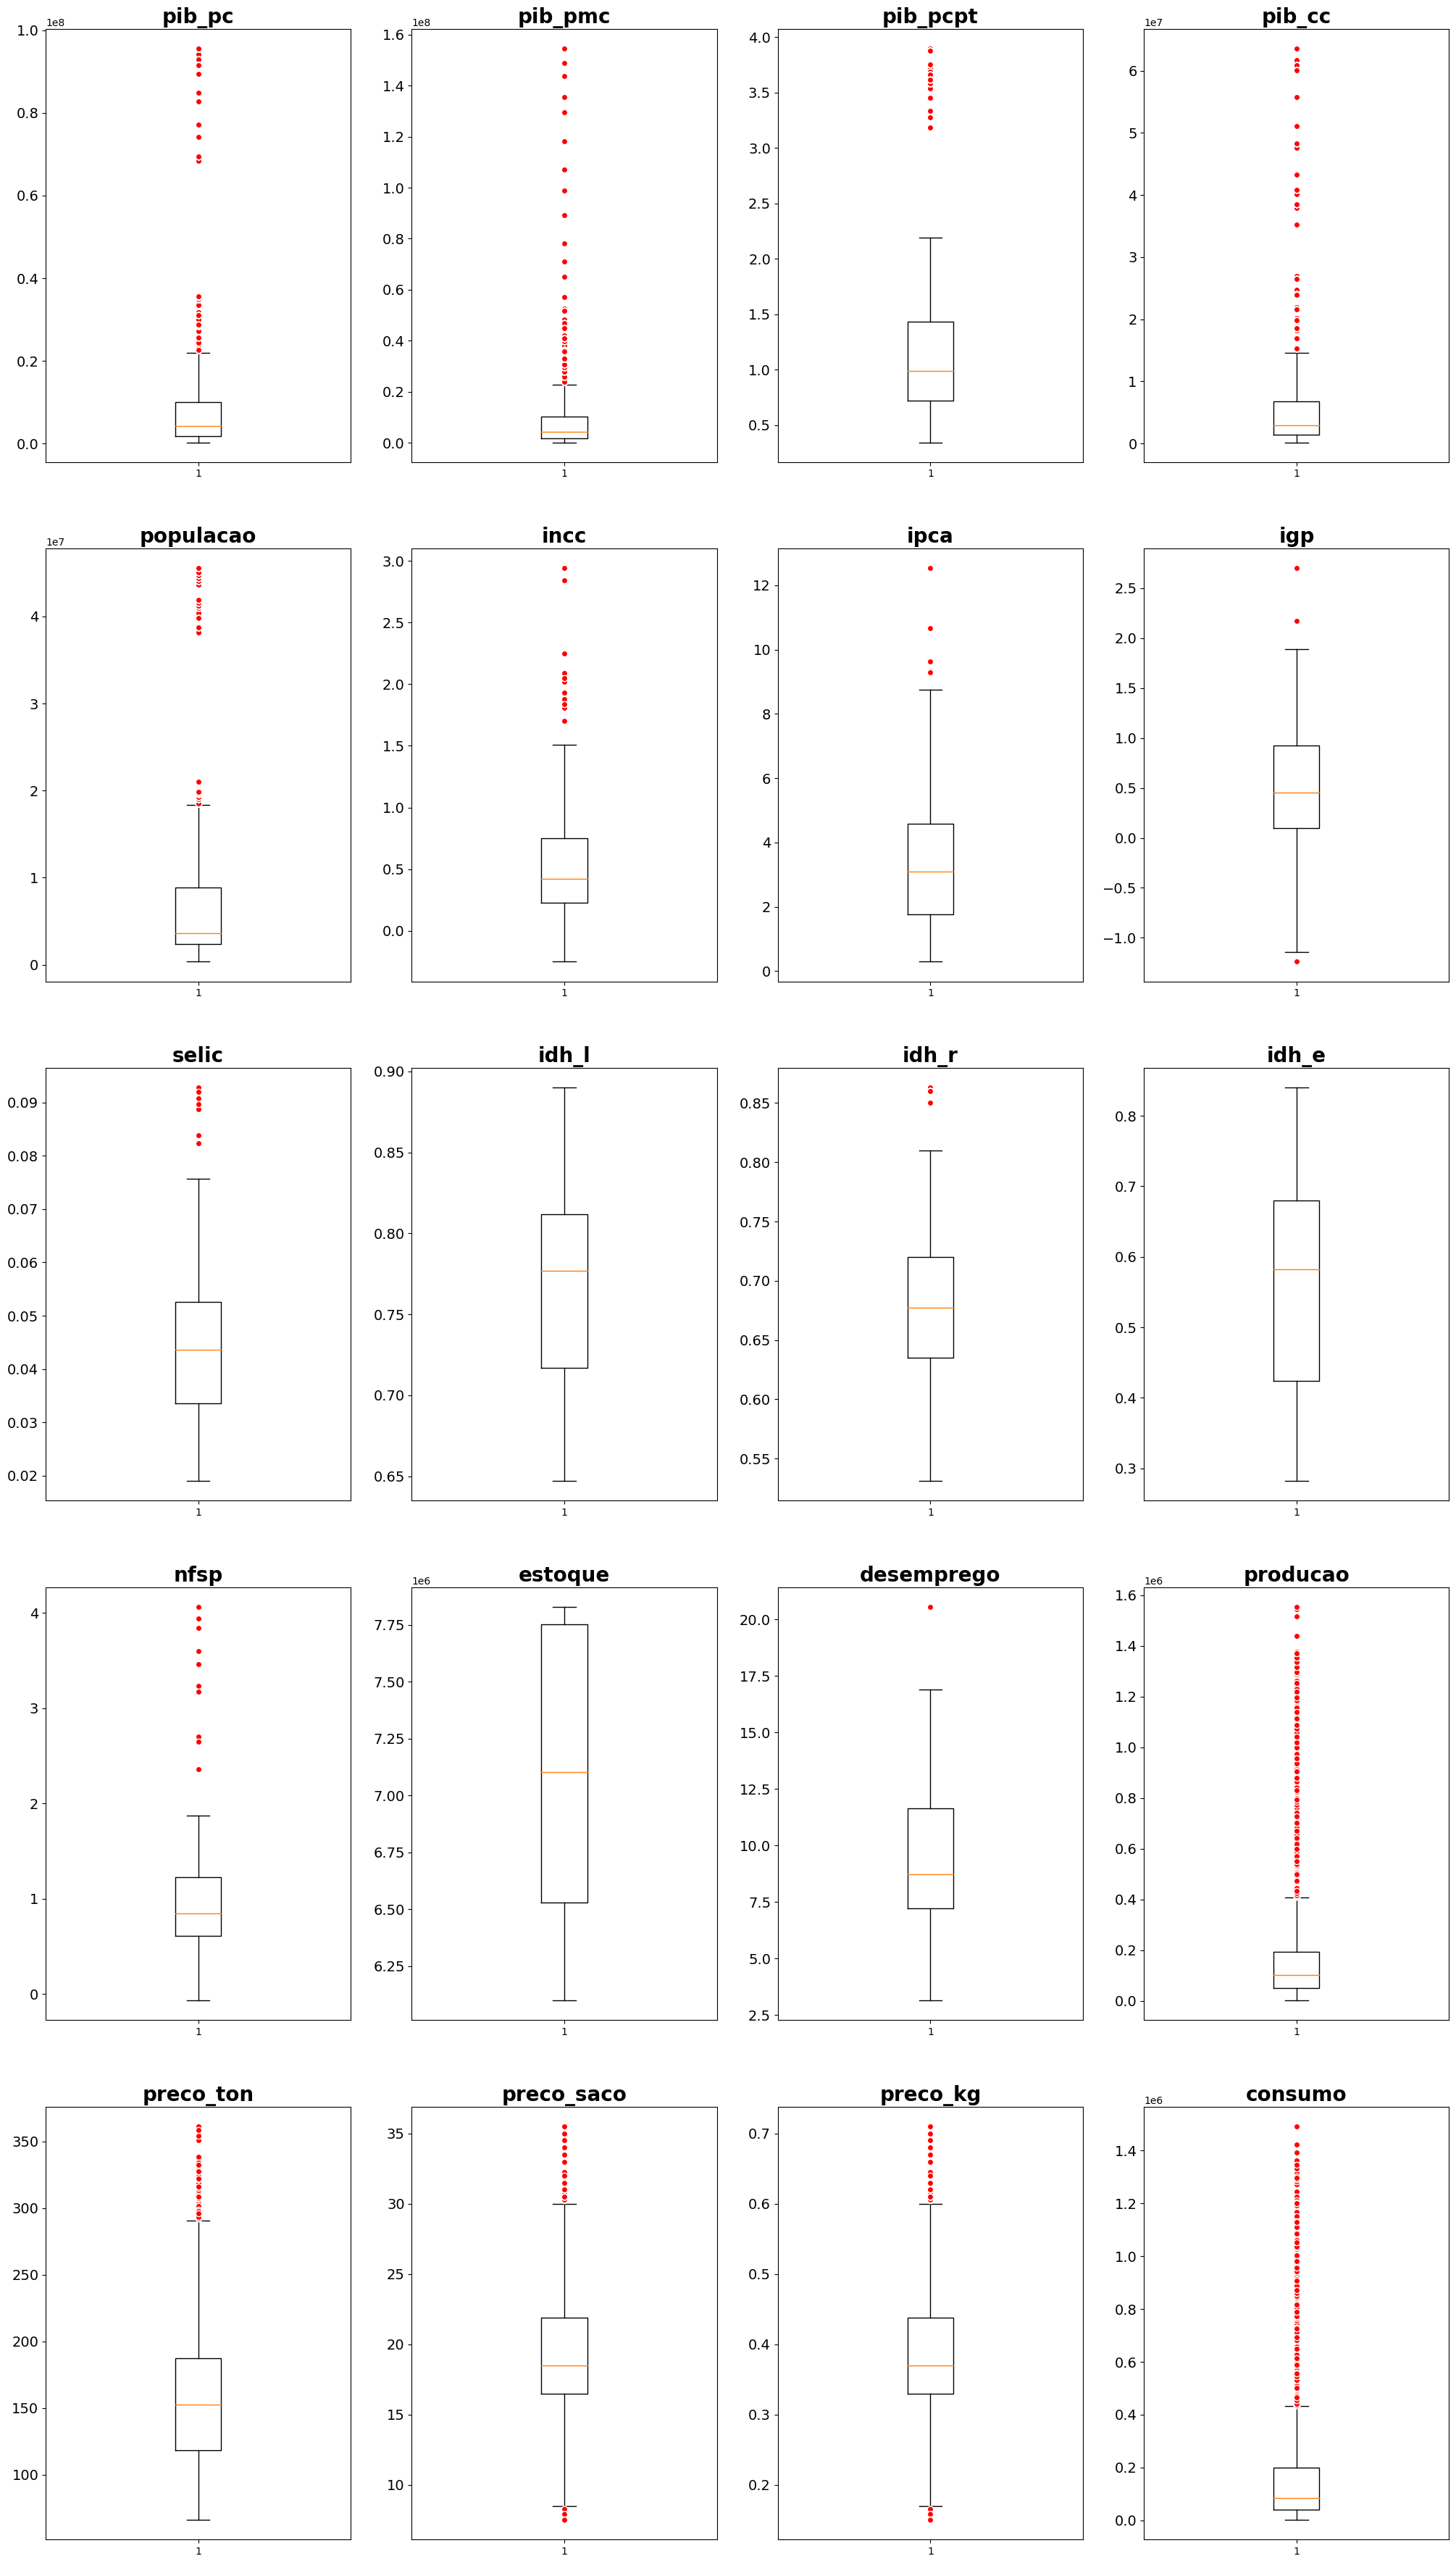

In [247]:
#Creating subplot of each column with its own scale
float64_columns = df.select_dtypes(include='float64').columns
df_float64_columns = df[float64_columns]

red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')
fig, axs = plt.subplots(5, 4, figsize=(25,45))

for i, ax in enumerate(axs.flat):
    ax.boxplot(df_float64_columns.iloc[:,i].dropna(), flierprops=red_circle)
    ax.set_title(df_float64_columns.columns[i], fontsize=20, fontweight='bold')
    ax.tick_params(axis='y', labelsize=14)

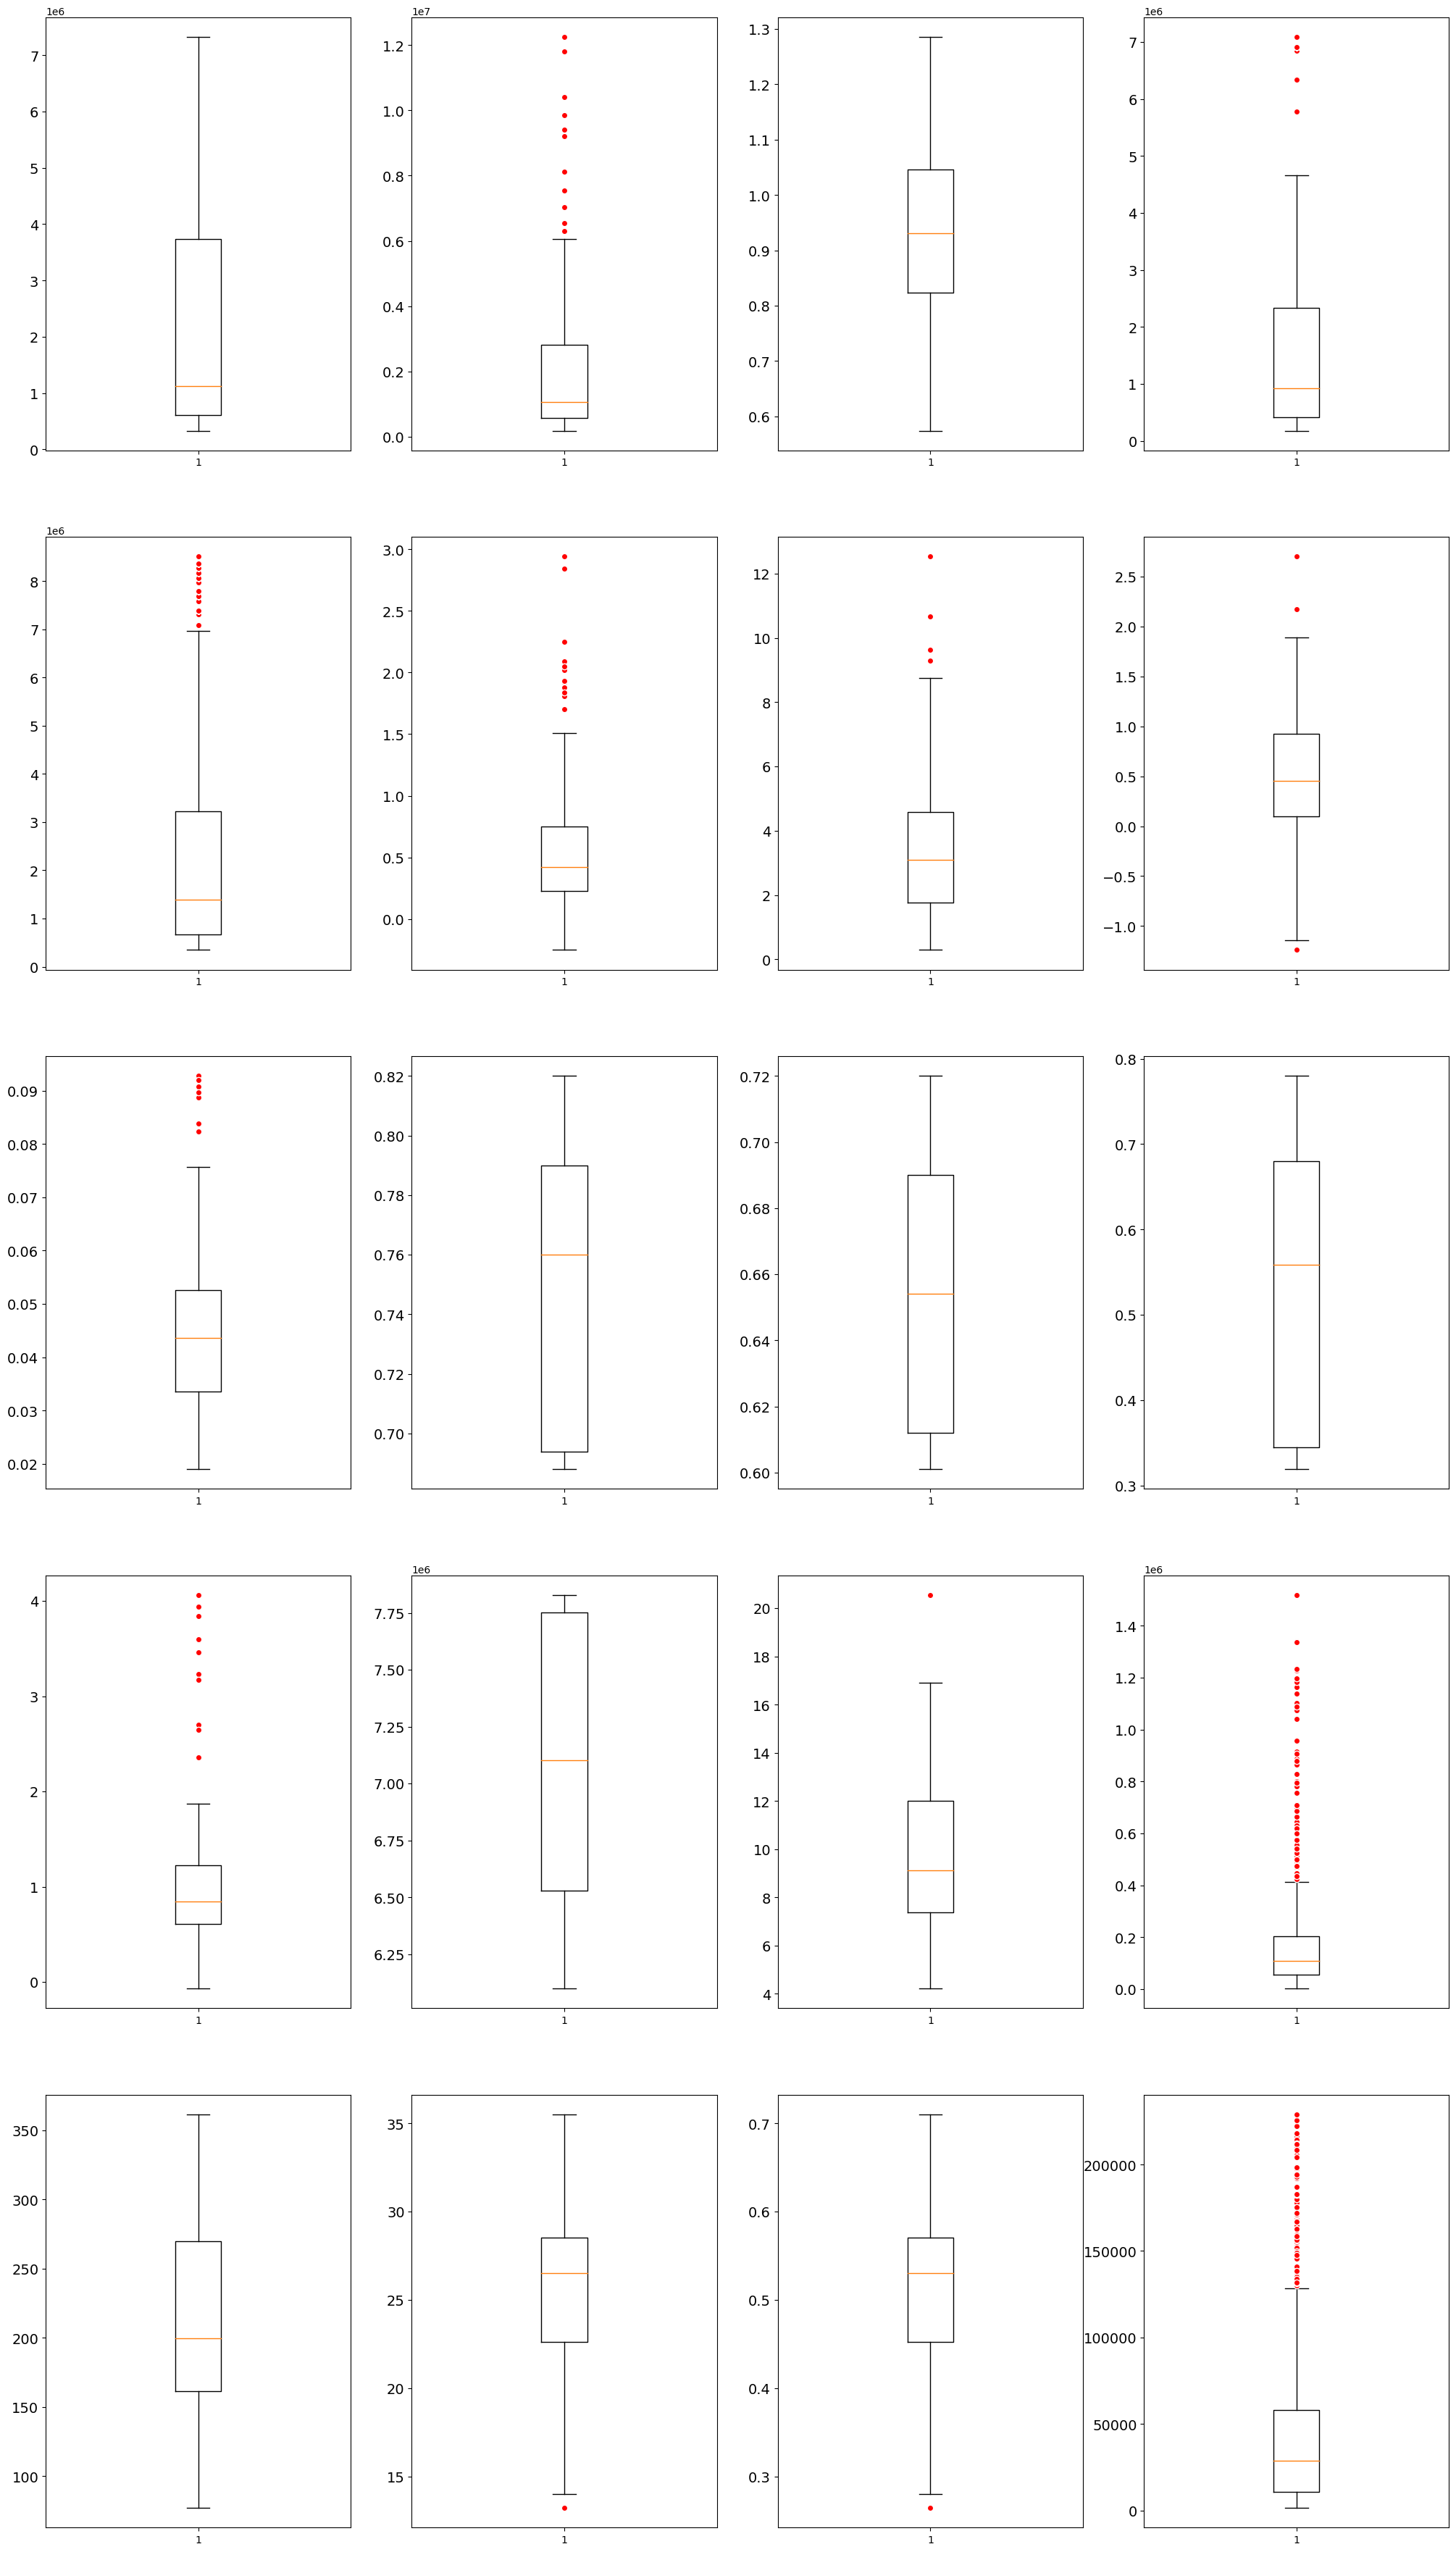

In [245]:
# Região Norte
df_n = df[df["regiao"] == N].copy()
#Creating subplot of each column with its own scale
float64_columns = df_n.select_dtypes(include='float64').columns
df_float64_columns = df_n[float64_columns]

red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')
fig, axs = plt.subplots(5, 4, figsize=(25,45))

for i, ax in enumerate(axs.flat):
    ax.boxplot(df_float64_columns.iloc[:,i].dropna(), flierprops=red_circle)
    ax.set_title(df_float64_columns.columns[i], fontsize=20, fontweight='bold')
    ax.tick_params(axis='y', labelsize=14)

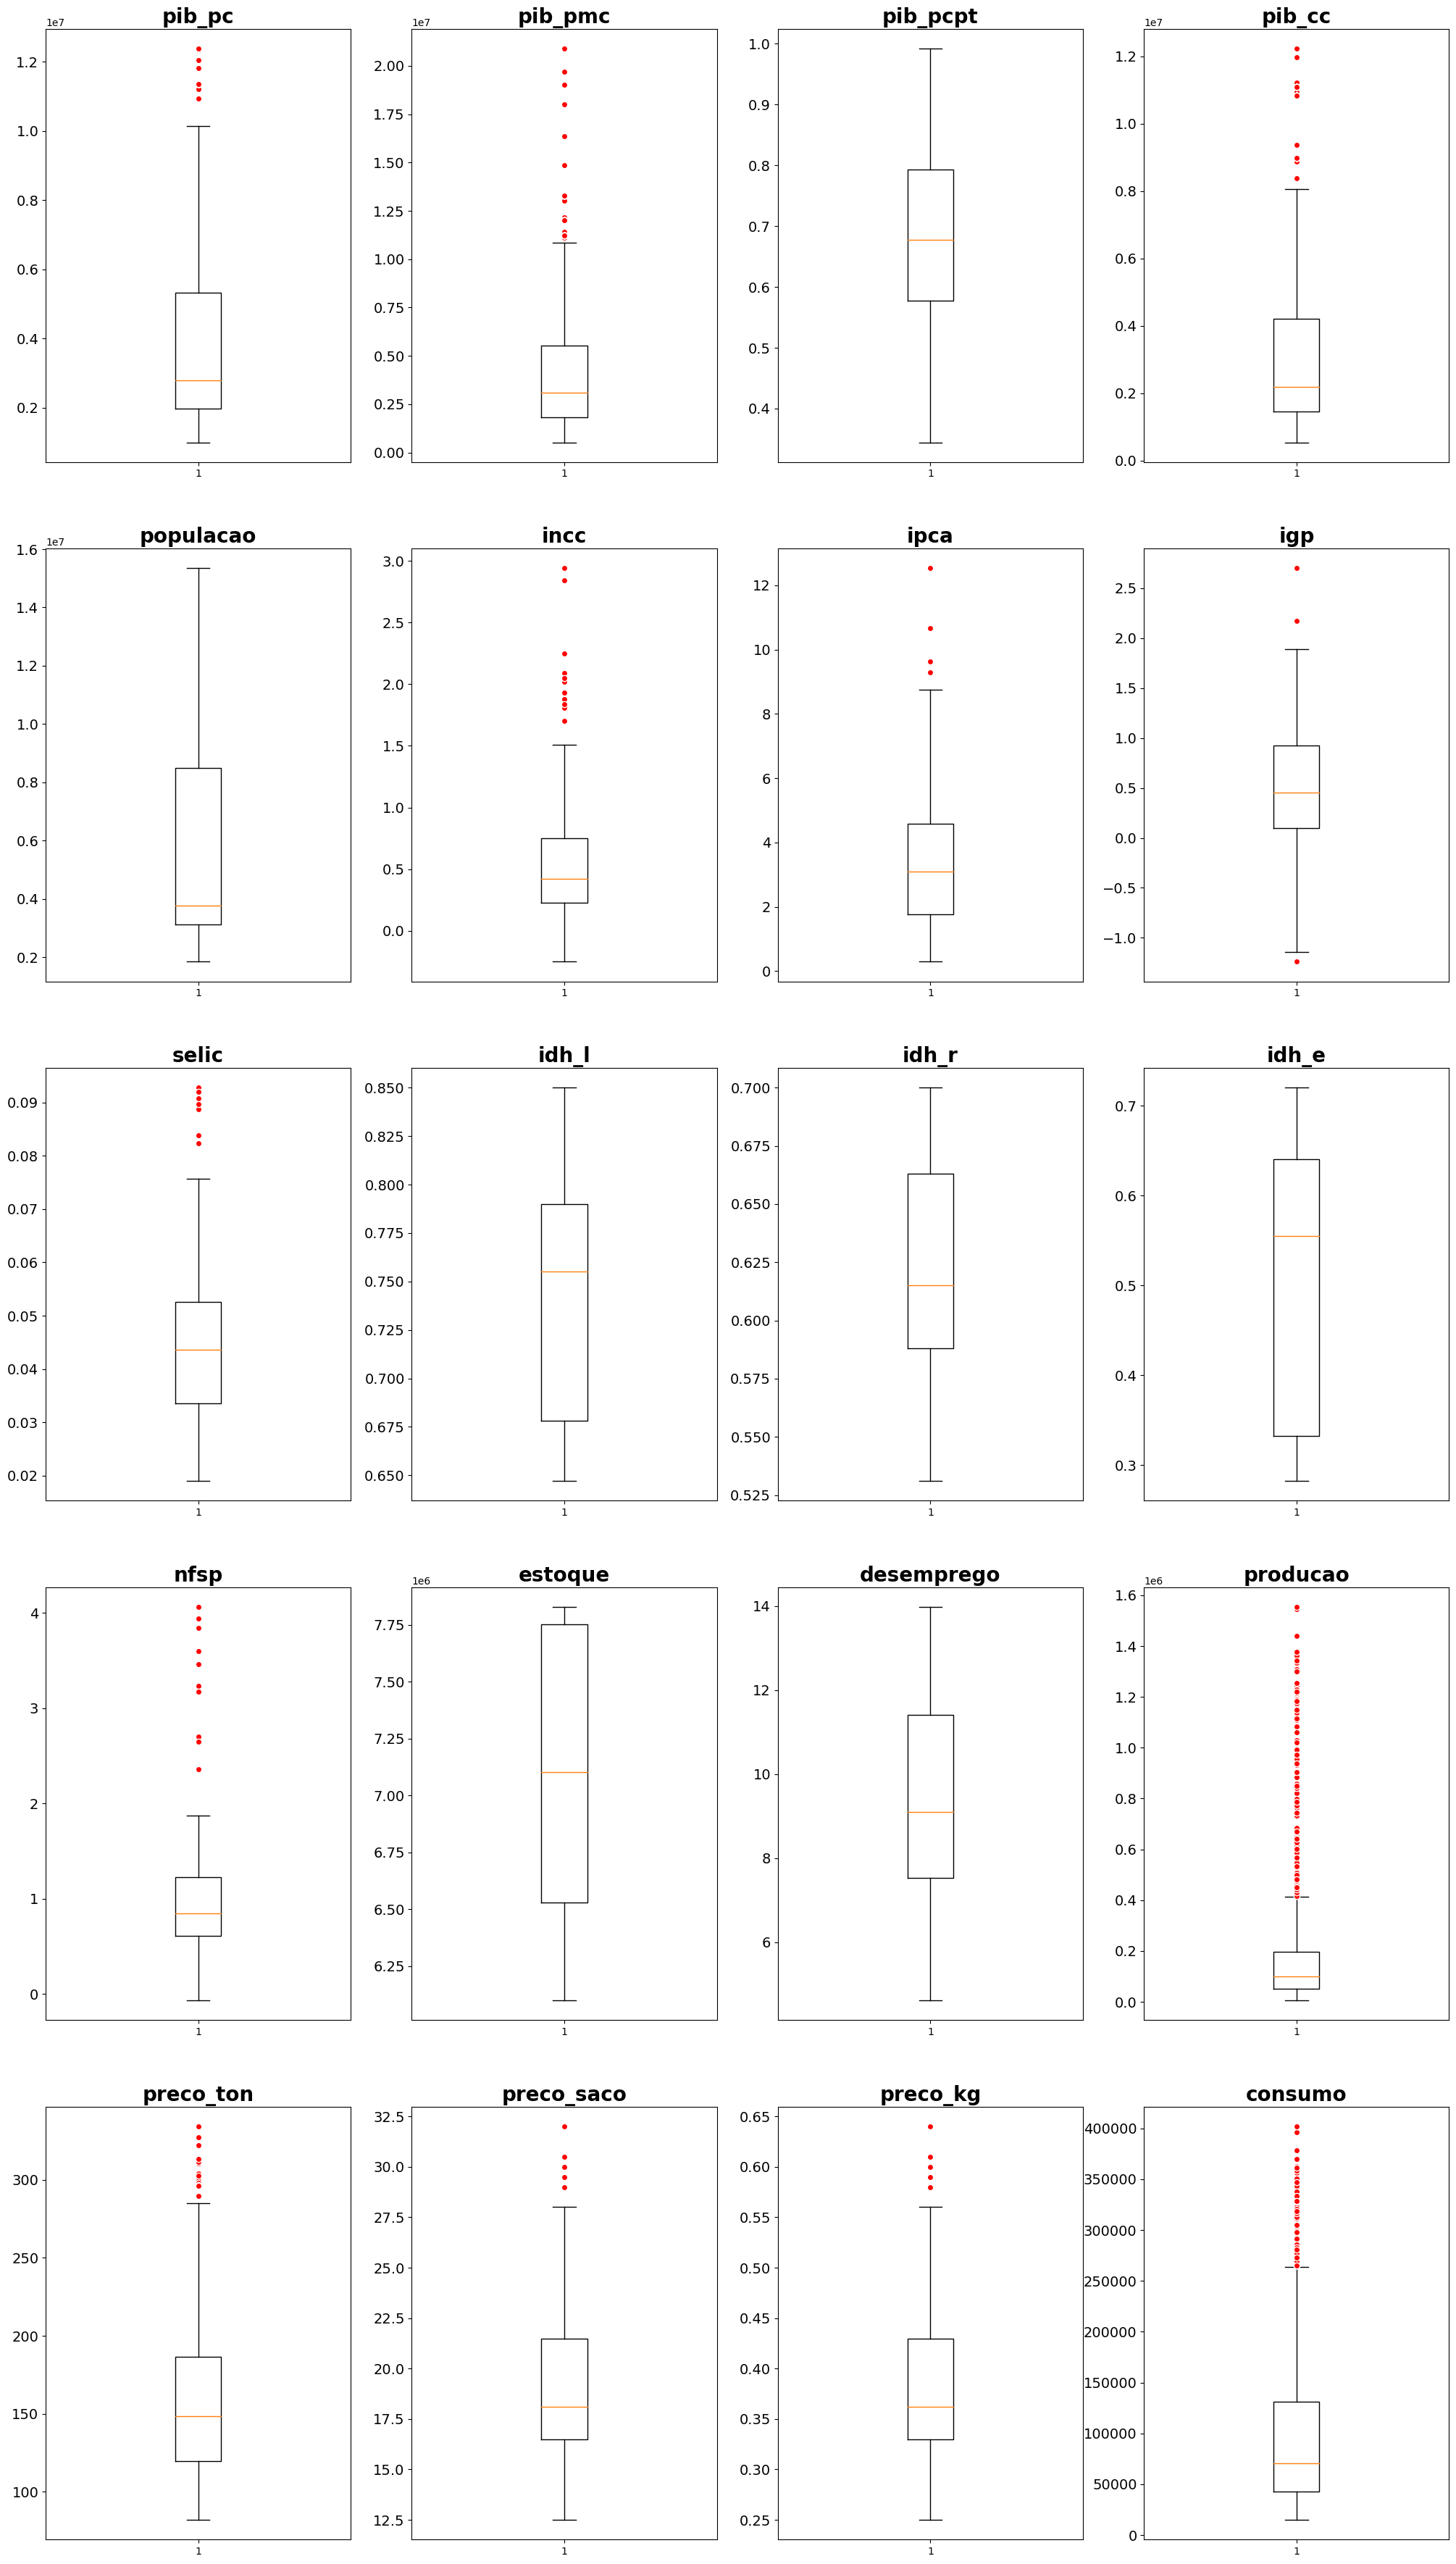

In [249]:
# Região Nordeste
df_ne = df[df["regiao"] == NE].copy()
#Creating subplot of each column with its own scale
float64_columns = df_ne.select_dtypes(include='float64').columns
df_float64_columns = df_ne[float64_columns]

red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')
fig, axs = plt.subplots(5, 4, figsize=(25,45))

for i, ax in enumerate(axs.flat):
    ax.boxplot(df_float64_columns.iloc[:,i].dropna(), flierprops=red_circle)
    ax.set_title(df_float64_columns.columns[i], fontsize=20, fontweight='bold')
    ax.tick_params(axis='y', labelsize=14)

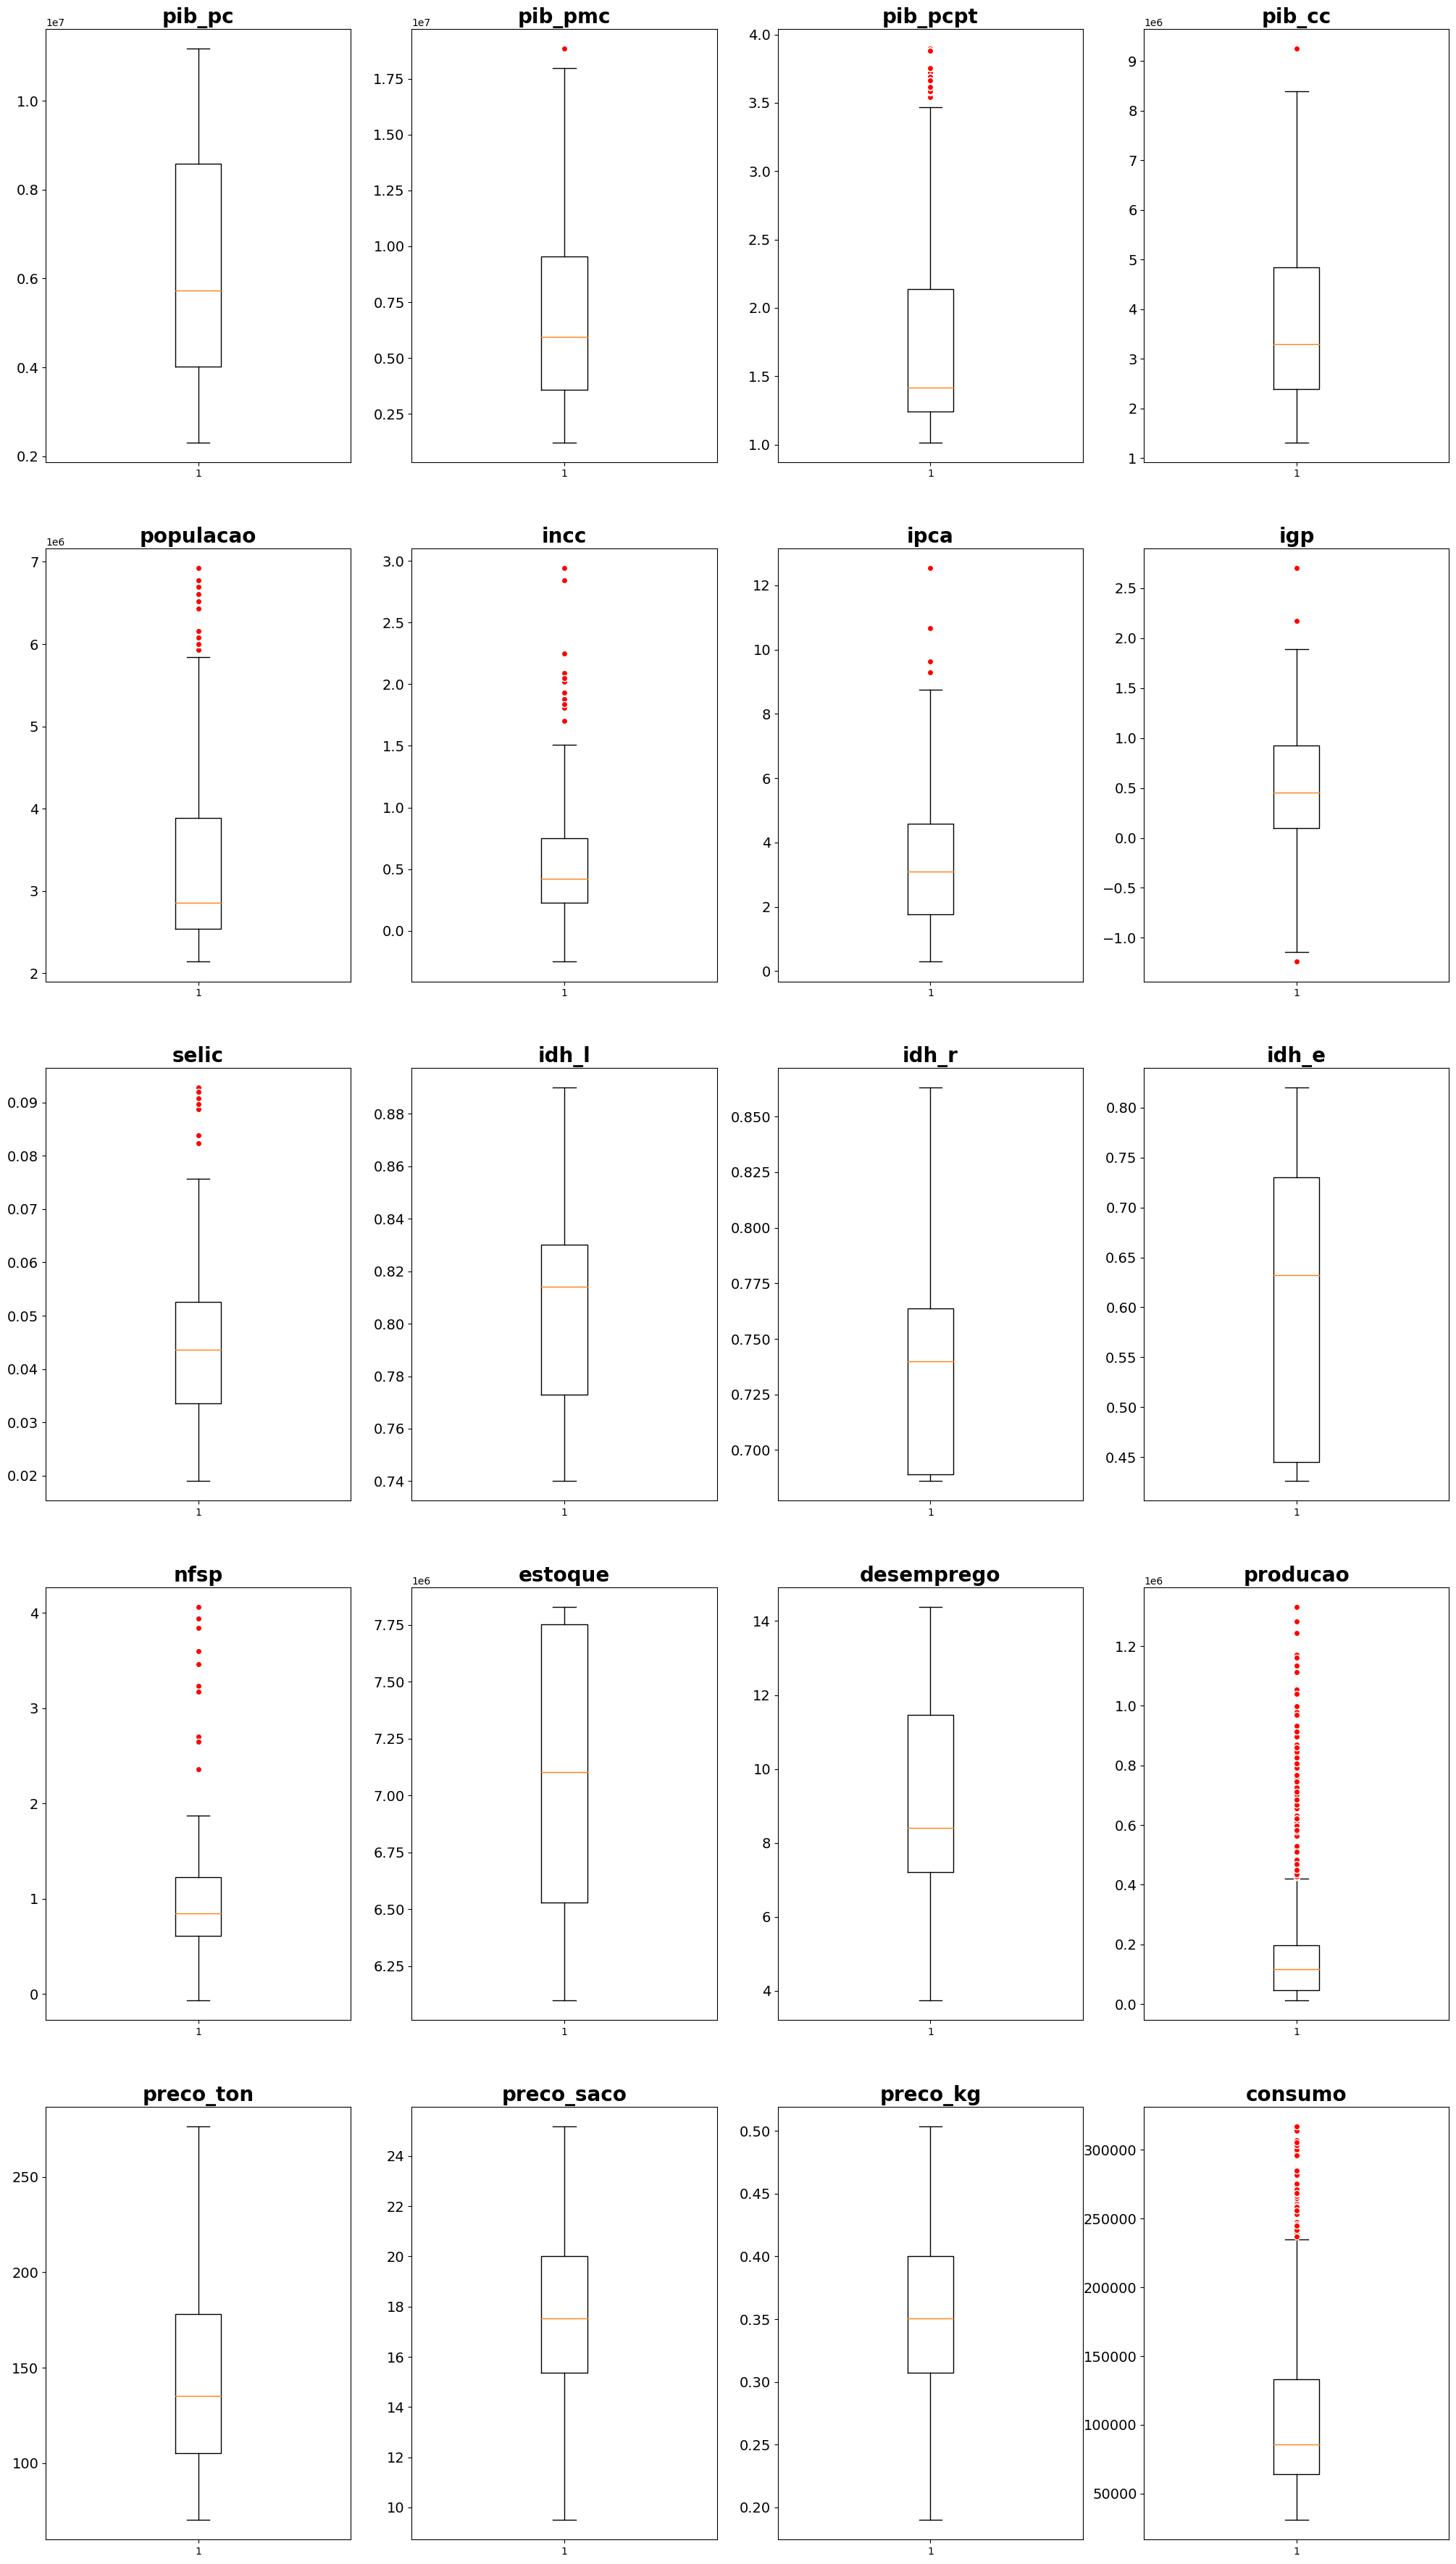

In [192]:
# Região Centro Oeste
df_co = df[df["regiao"] == CO].copy()
#Creating subplot of each column with its own scale
float64_columns = df_ne.select_dtypes(include='float64').columns
df_float64_columns = df_co[float64_columns]

red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')
fig, axs = plt.subplots(5, 4, figsize=(25,45))

for i, ax in enumerate(axs.flat):
    ax.boxplot(df_float64_columns.iloc[:,i].dropna(), flierprops=red_circle)
    ax.set_title(df_float64_columns.columns[i], fontsize=20, fontweight='bold')
    ax.tick_params(axis='y', labelsize=14)

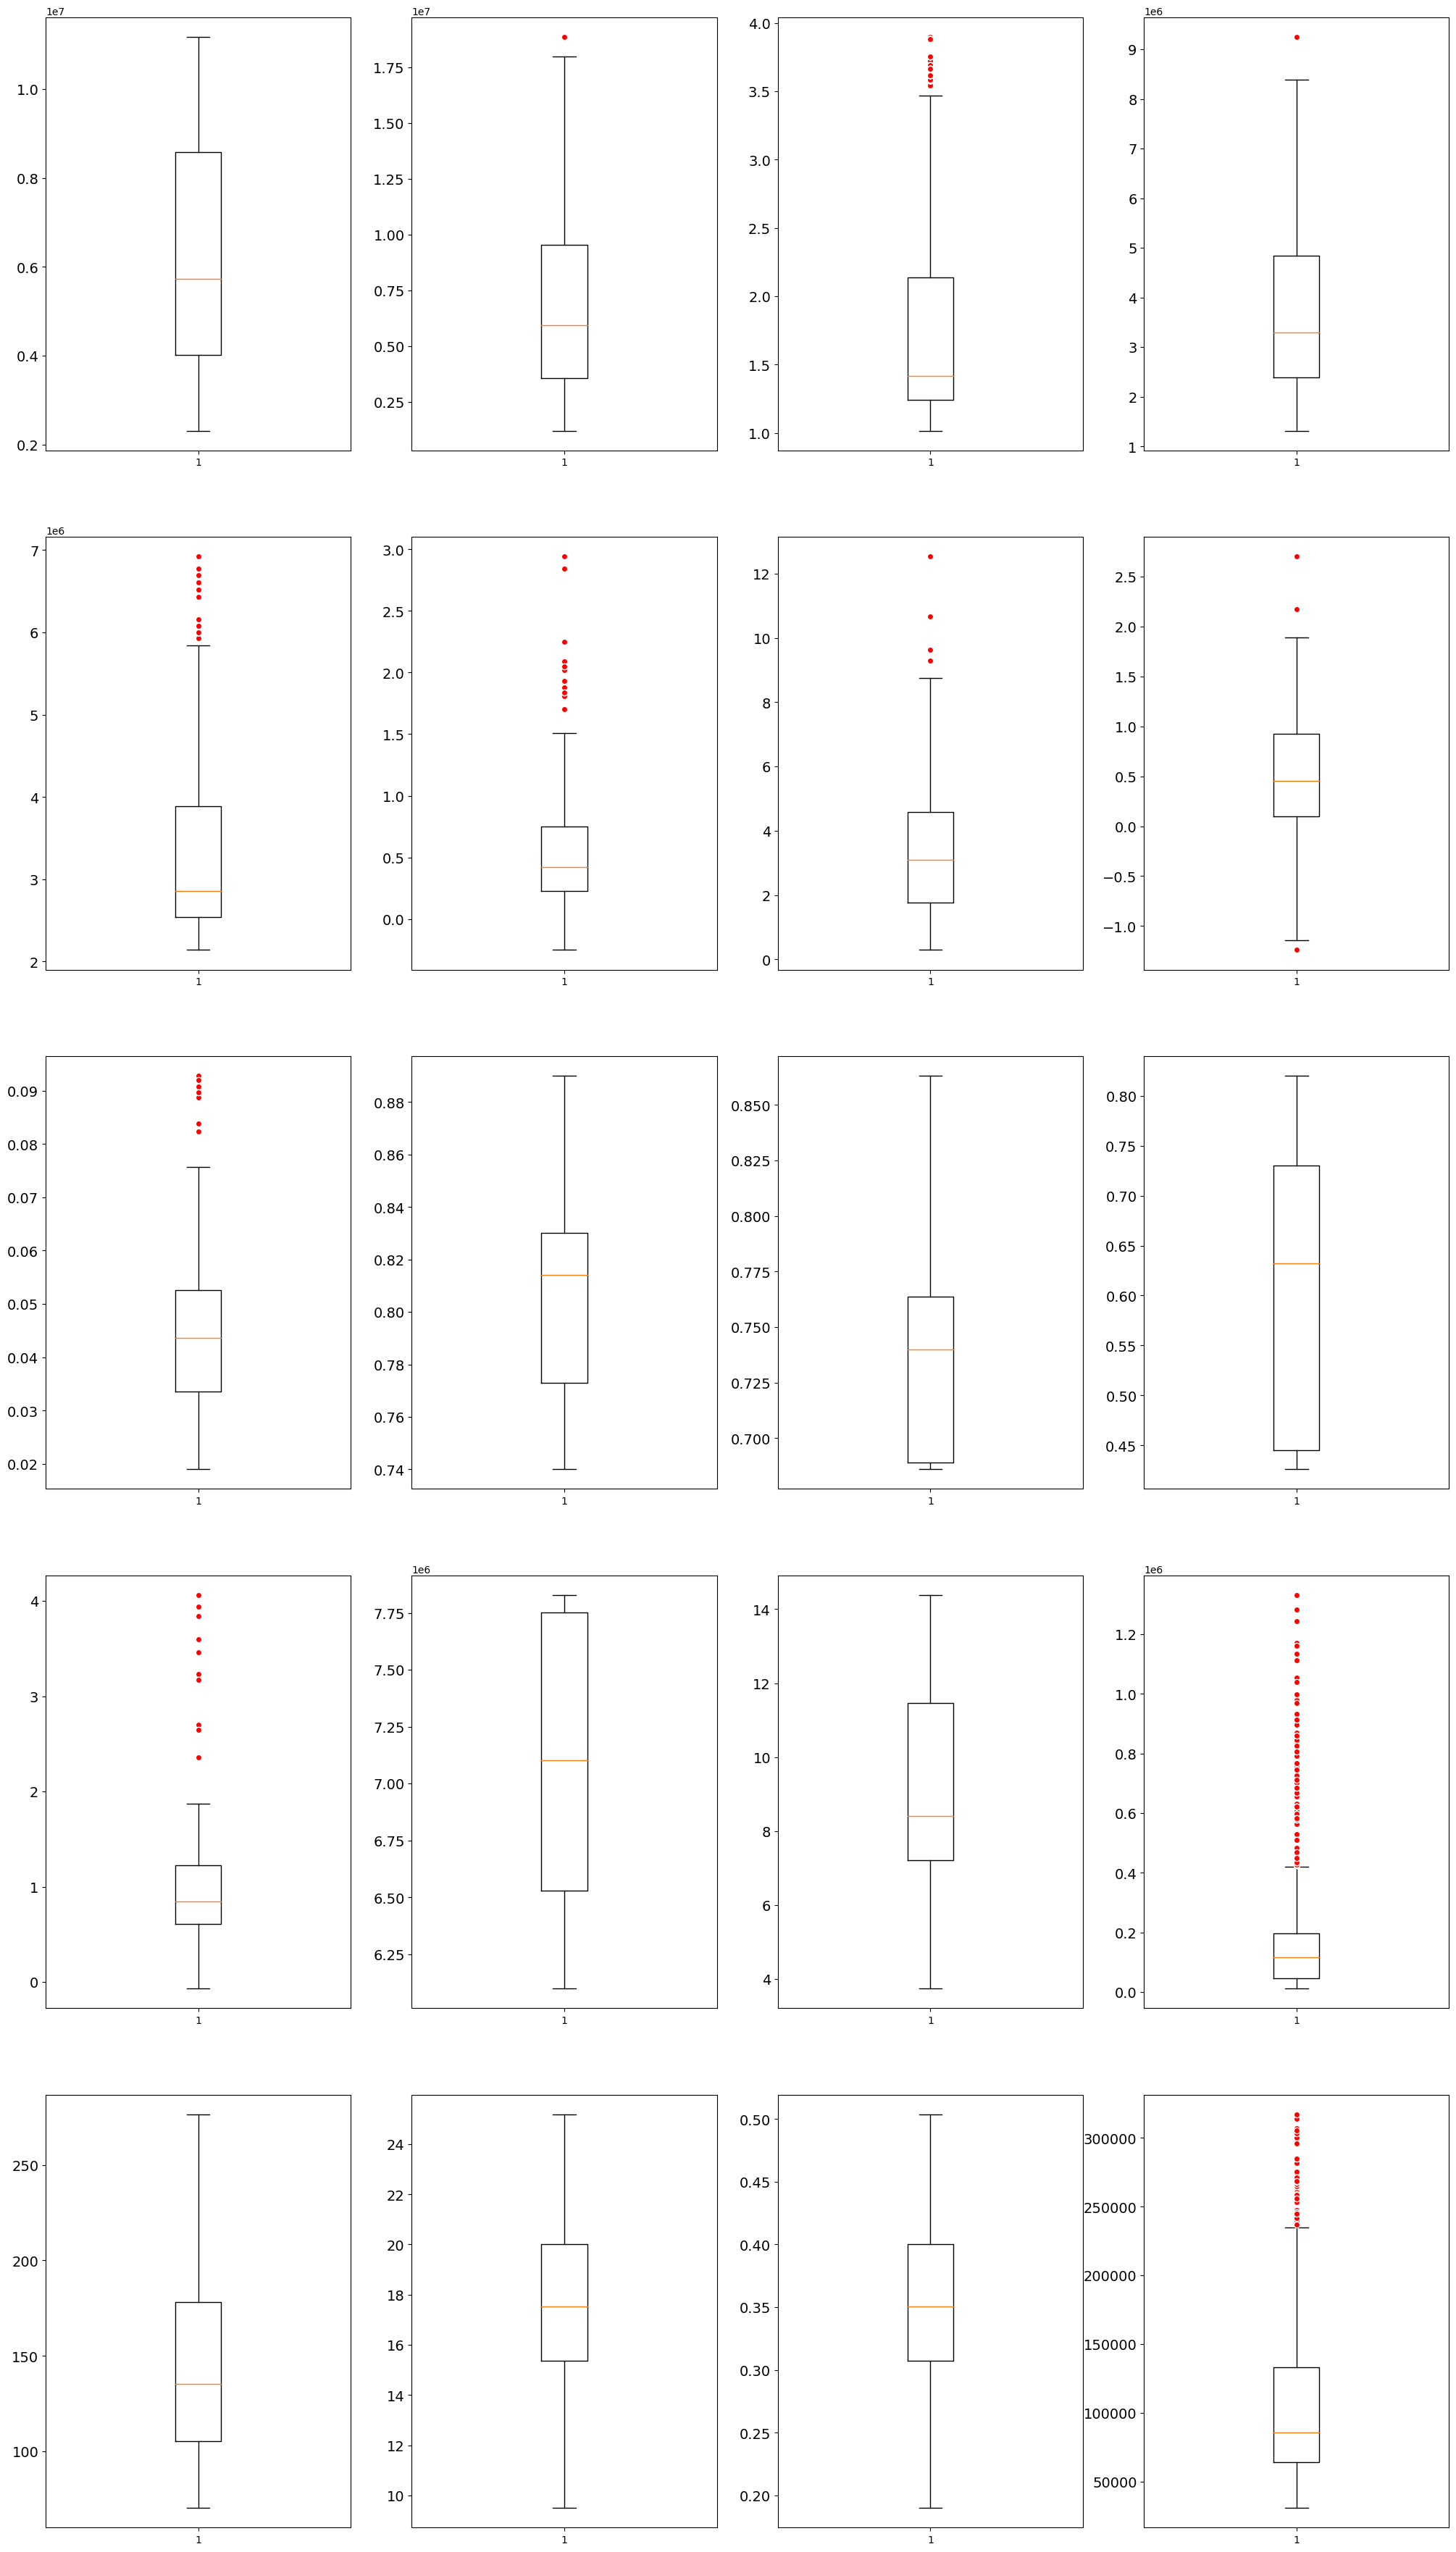

In [248]:
# Região Sudeste
df_se = df[df["regiao"] == SE].copy()
#Creating subplot of each column with its own scale
float64_columns = df_se.select_dtypes(include='float64').columns
df_float64_columns = df_co[float64_columns]

red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')
fig, axs = plt.subplots(5, 4, figsize=(25,45))

for i, ax in enumerate(axs.flat):
    ax.boxplot(df_float64_columns.iloc[:,i].dropna(), flierprops=red_circle)
    # ax.set_title(df_float64_columns.columns[i], fontsize=20, fontweight='bold')
    ax.tick_params(axis='y', labelsize=14)

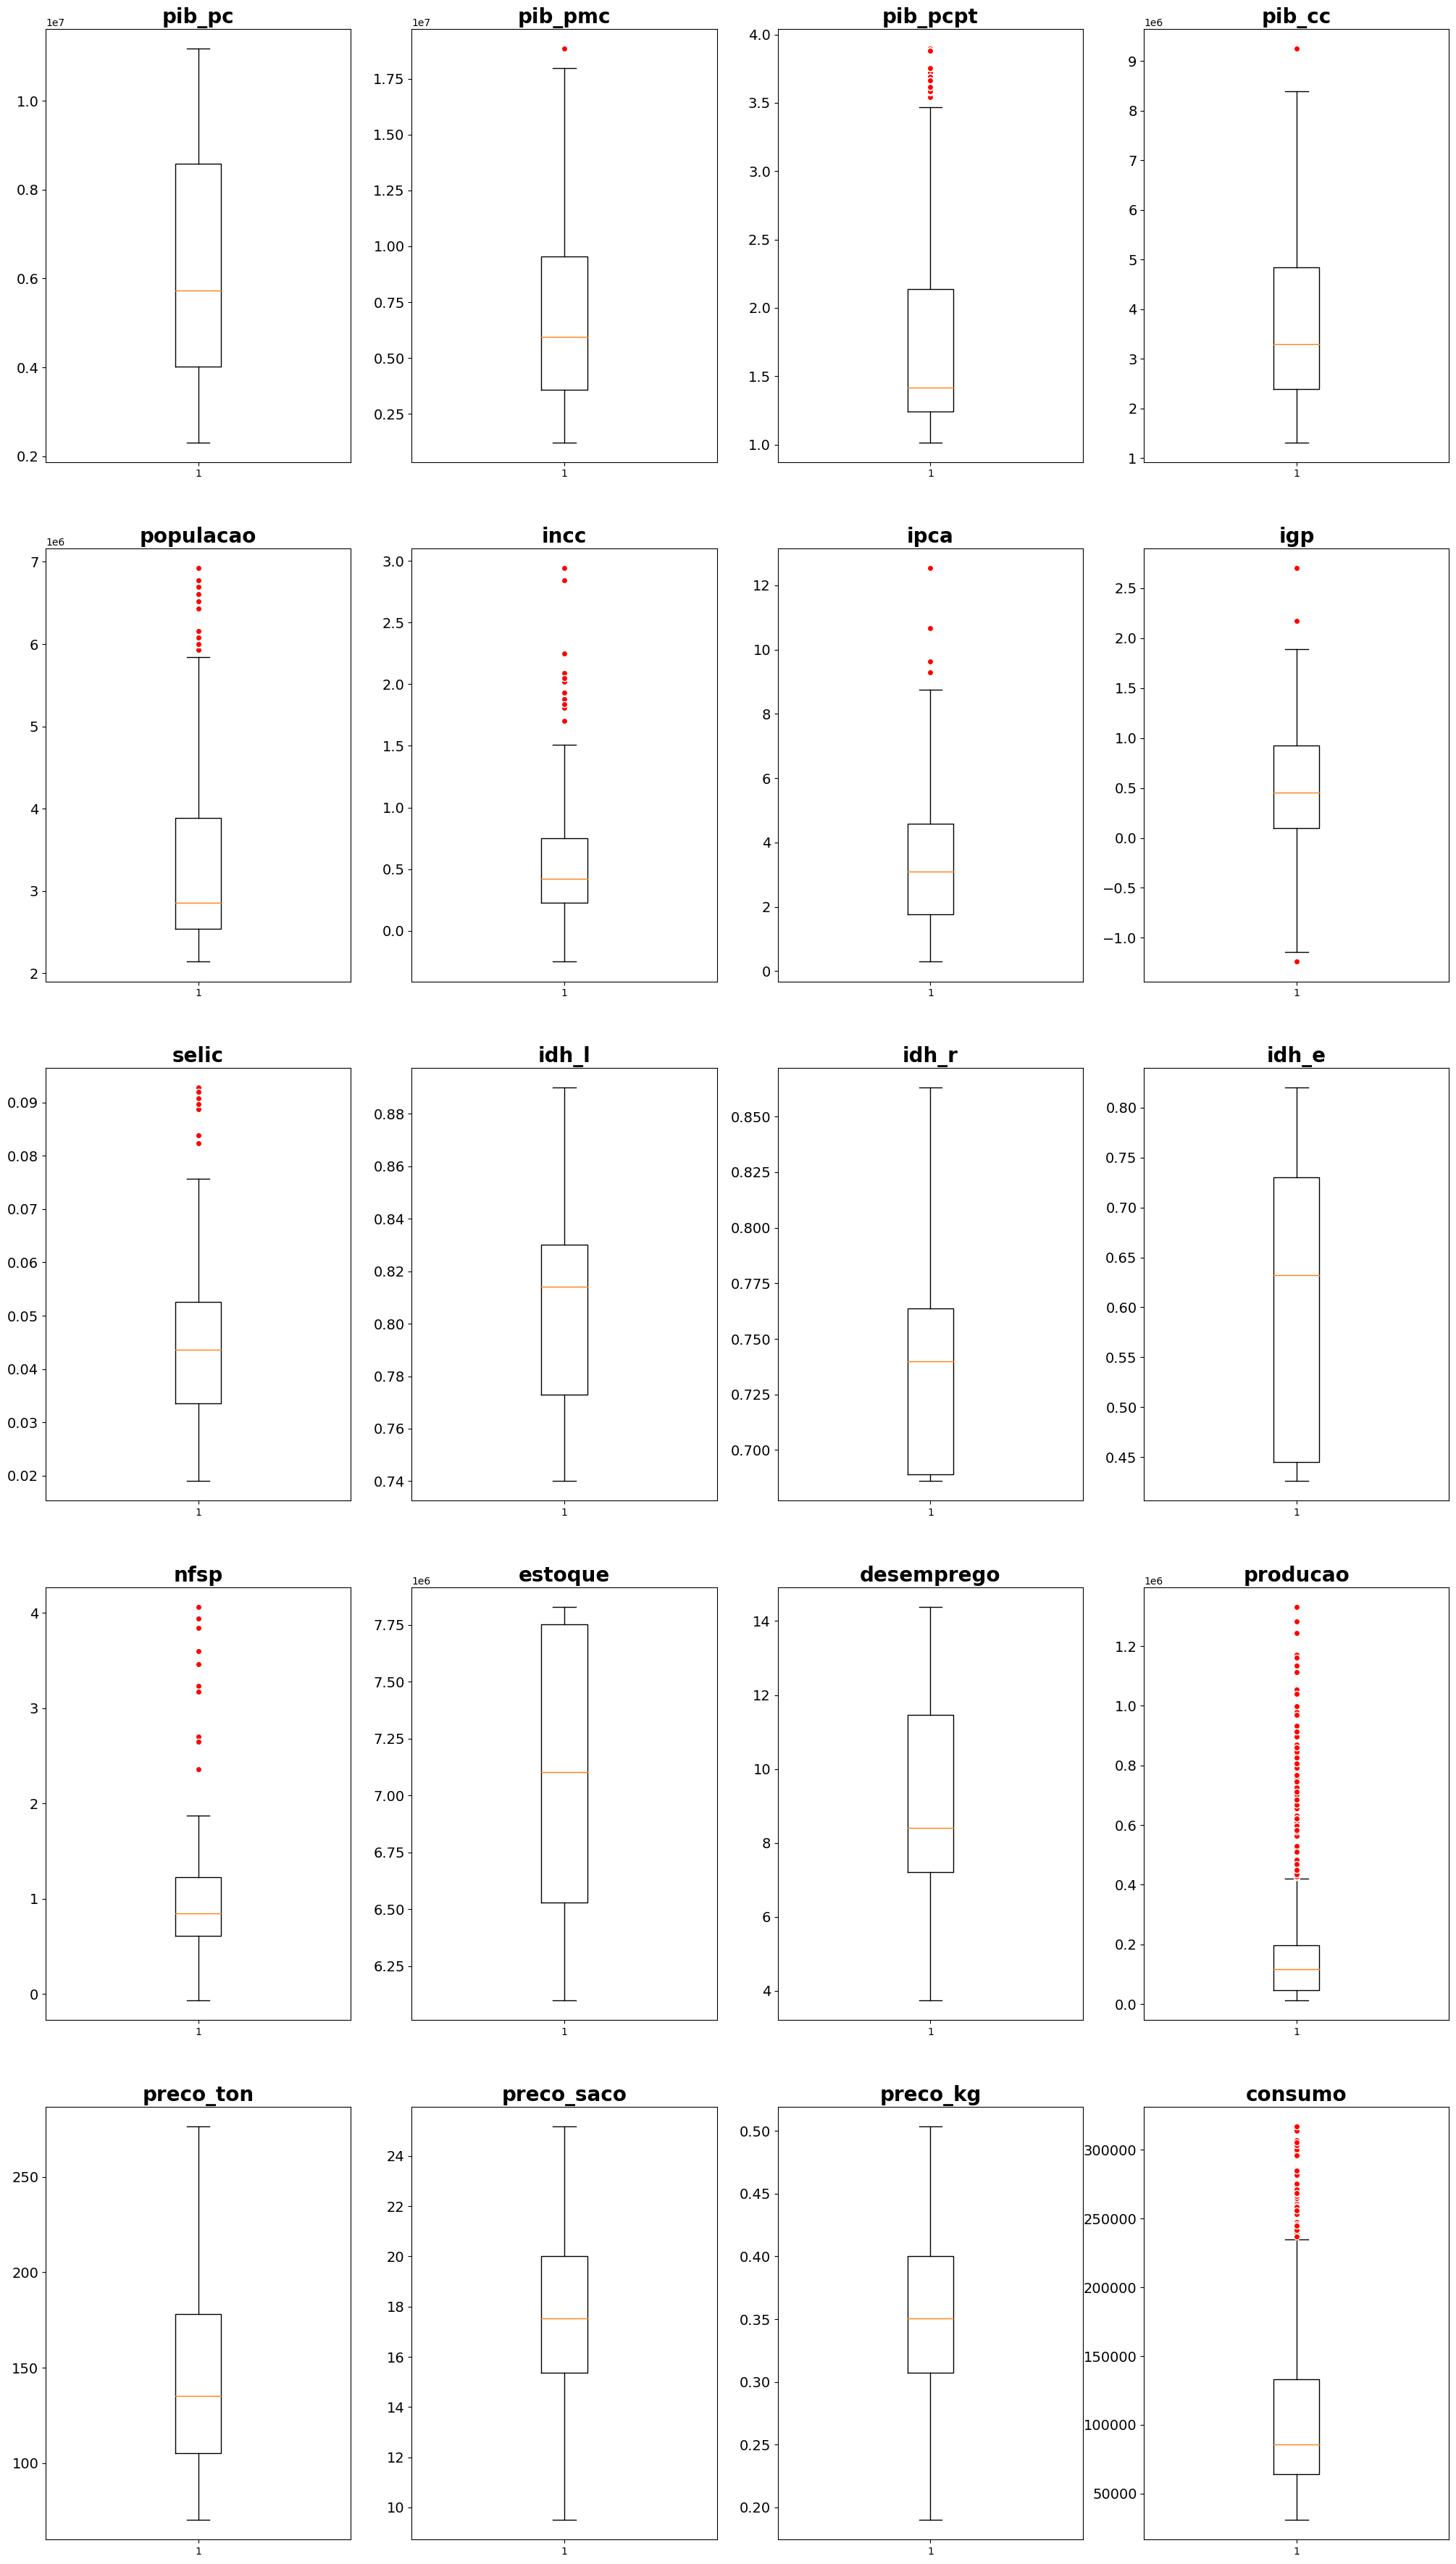

In [194]:
# Região Sudeste
df_s = df[df["regiao"] == S].copy()
#Creating subplot of each column with its own scale
float64_columns = df_s.select_dtypes(include='float64').columns
df_float64_columns = df_co[float64_columns]

red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')
fig, axs = plt.subplots(5, 4, figsize=(25,45))

for i, ax in enumerate(axs.flat):
    ax.boxplot(df_float64_columns.iloc[:,i].dropna(), flierprops=red_circle)
    ax.set_title(df_float64_columns.columns[i], fontsize=20, fontweight='bold')
    ax.tick_params(axis='y', labelsize=14)

<AxesSubplot: >

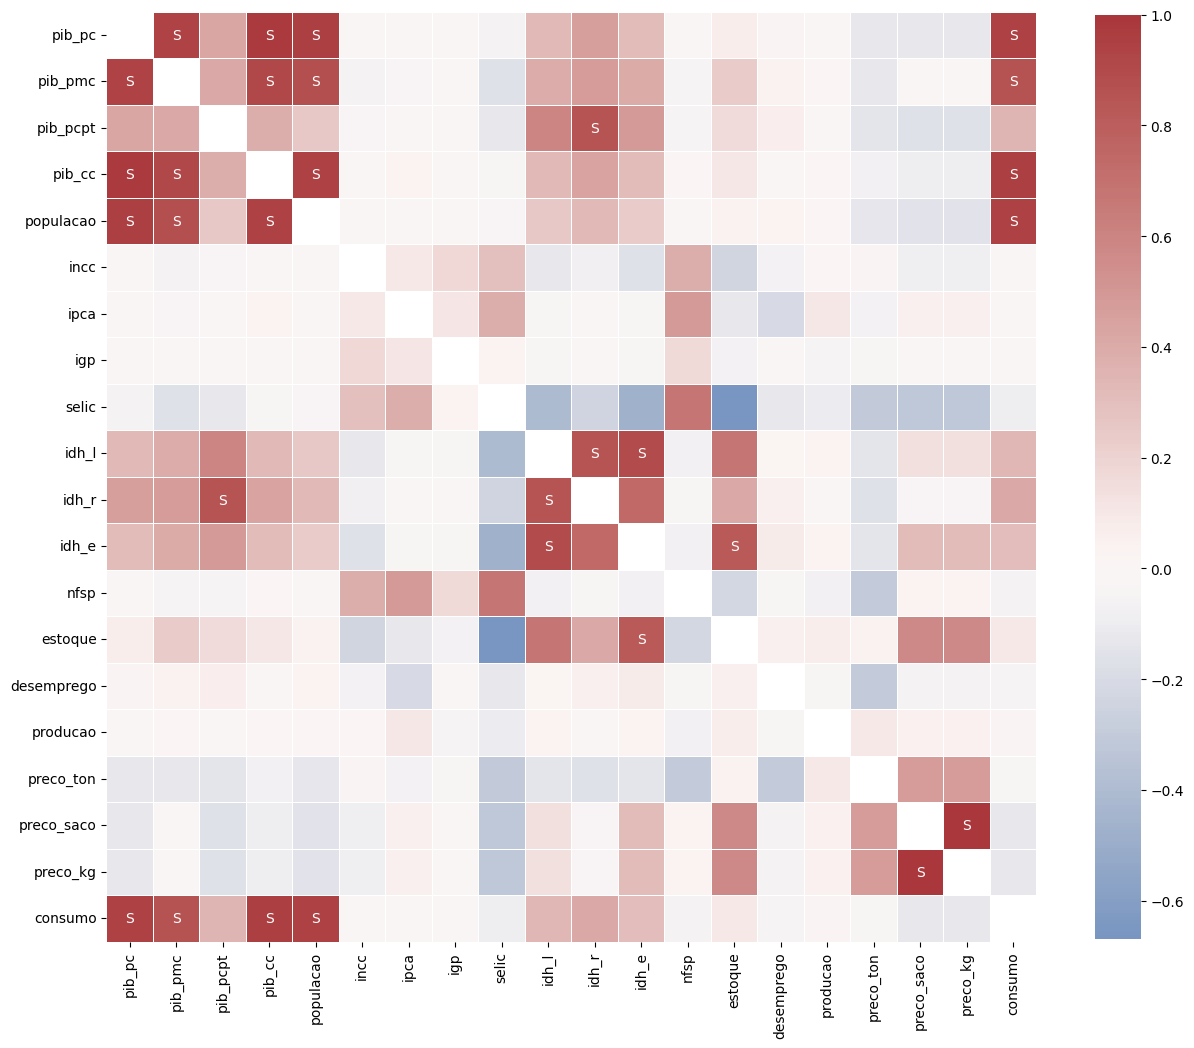

In [195]:
df_corr = df.corr(method="pearson")

# Create labels for the correlation matrix
labels = np.where(np.abs(df_corr) >= 0.75, "S", "")


# Plot correlation matrix
plt.figure(figsize=(15, 15))

sns.heatmap(
    df_corr,
    mask=np.eye(len(df_corr)),
    square=True,
    center=0,
    annot=labels,
    fmt="",
    linewidths=0.5,
    cmap="vlag",
    cbar_kws={"shrink": 0.8},
)


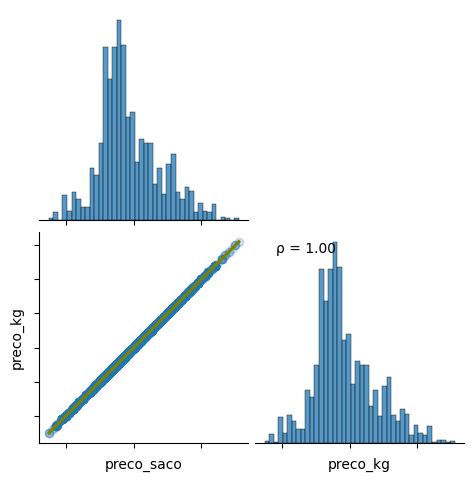

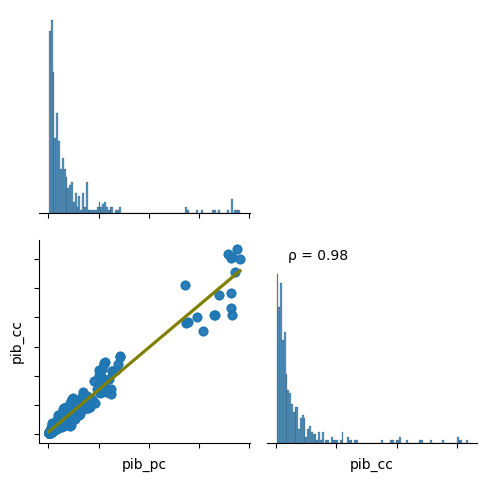

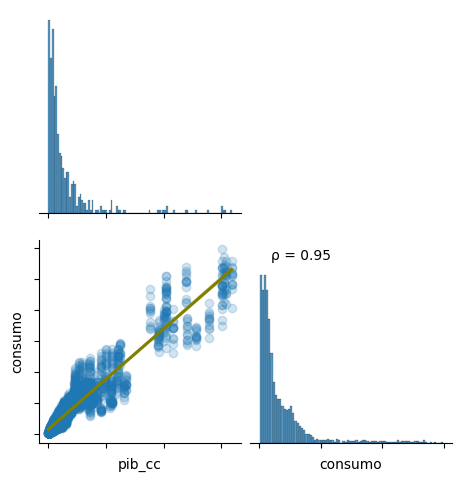

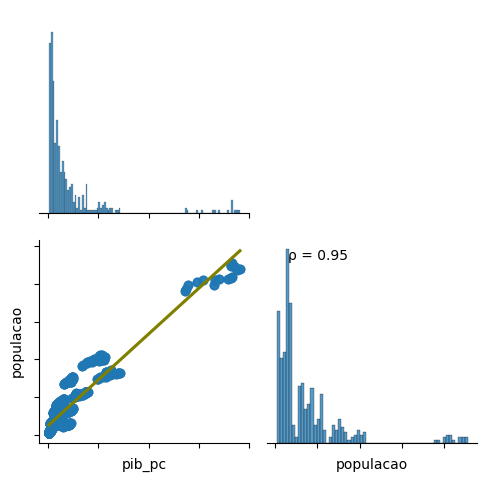

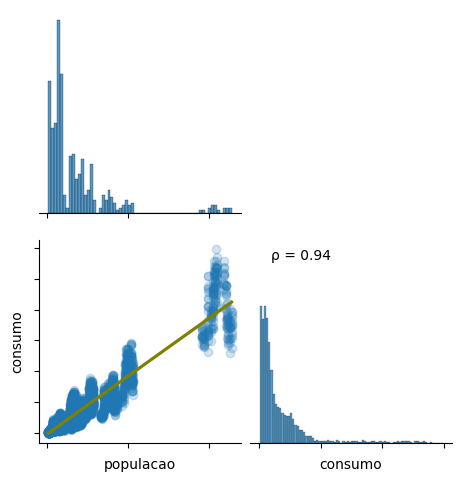

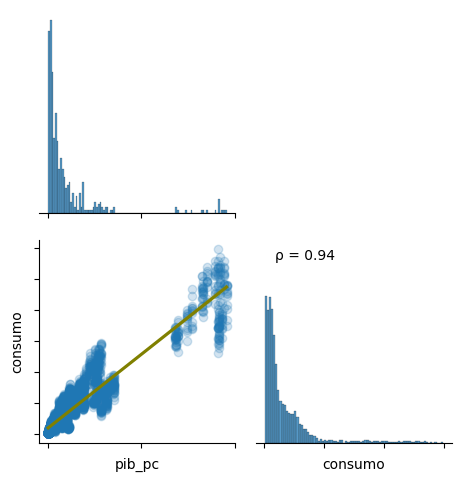

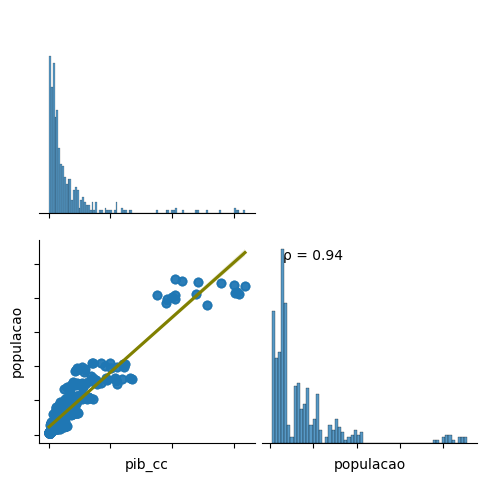

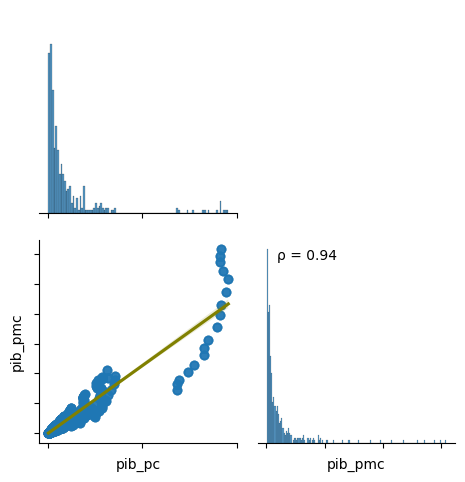

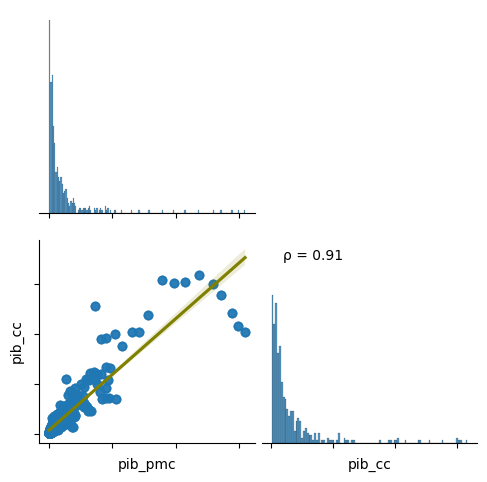

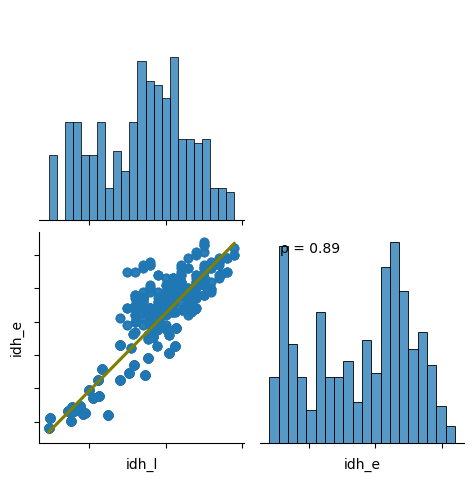

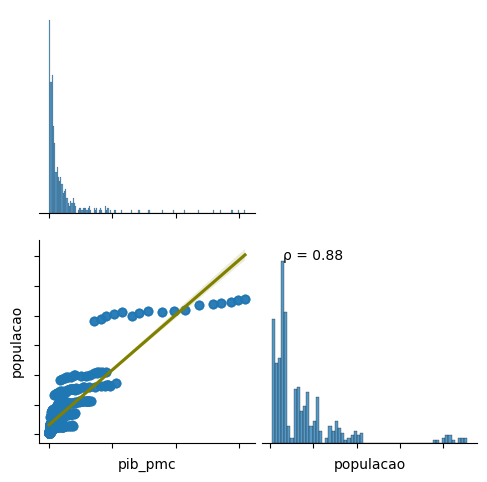

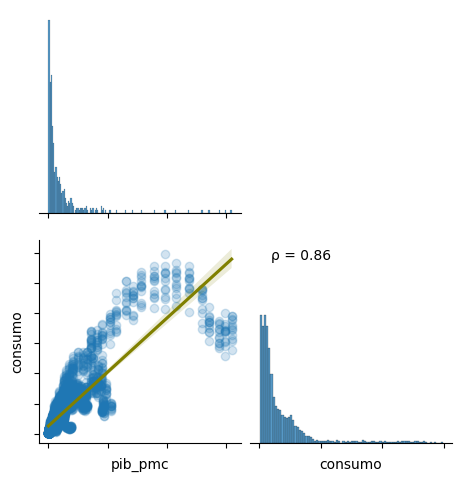

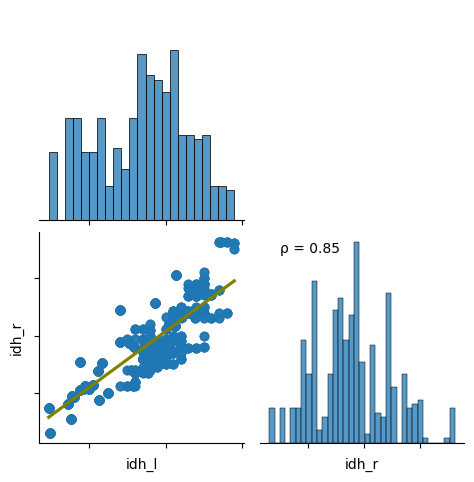

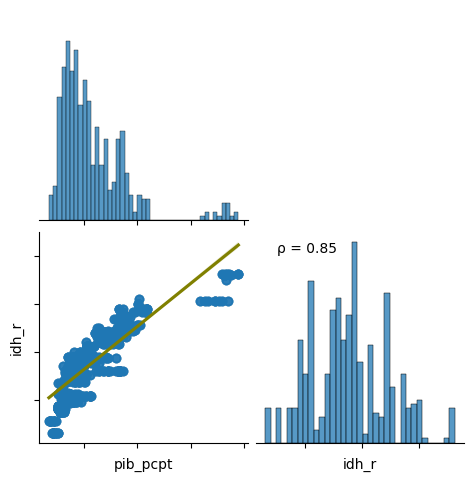

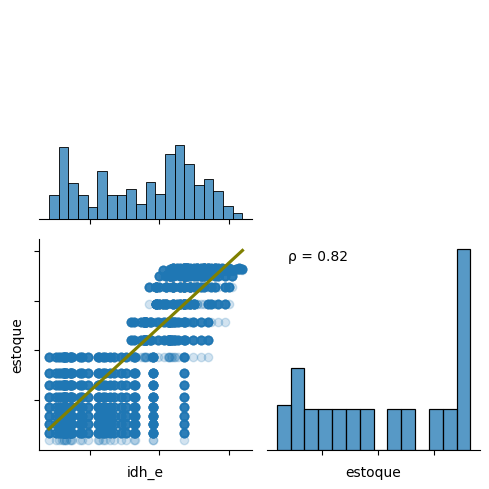

In [196]:
def corrfunc(x, y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    ax.annotate(f"ρ = {r:.2f}", xy=(0.1, 0.9), xycoords=ax.transAxes)
    return None

for pair in sol[sol > 0.75].index.values:
    if pair[0] != pair[1]:
        data = df[[pair[0], pair[1]]].dropna()
        g = sns.pairplot(
            data,
            corner=True,
            kind="reg",
            plot_kws={"line_kws": {"color": "olive"}, "scatter_kws": {"alpha": 0.2}},
        )
        corrfunc(data[pair[0]], data[pair[1]])
        g.set(xticklabels=[])
        g.set(yticklabels=[])

plt.tight_layout()

# Consumo

In [12]:
df=df.set_index('data')

In [13]:
N='NORTE'
NE="NORDESTE"
CO='CENTRO OESTE'
SE='SUDESTE'
S = 'SUL'

REGIOES = {
    'AC': N, 'AL': NE, 'AM' : N, 'AP' : N, 'BA' : NE, 'CE' : NE,
    'DF' : CO, 'ES' : SE, 'GO' : CO, 'MA' : NE,
    'MG' : SE, 'MS' : CO, 'MT' : CO, 'PA' : N, 'PB' : NE,
    'PE' : NE, 'PI' : NE, 'PR' : S, 'RJ' : SE,
    'RN' : NE, 'RO' : N, 'RR' : N, 'RS' : S,
    'SC' : S, 'SE' : NE, 'SP' : SE, 'TO' : N}

df["regiao"] = df["estados"].apply(lambda x : REGIOES[x])

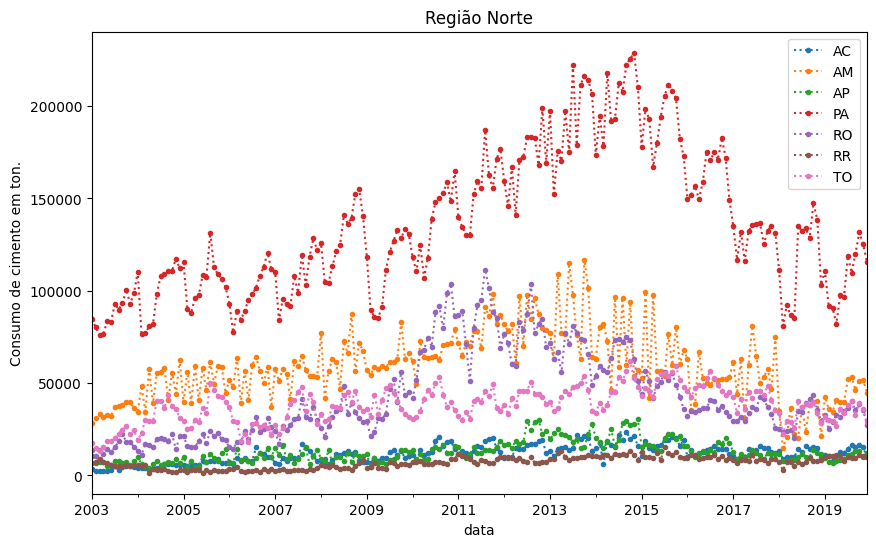

In [16]:
plt.figure(figsize=(10,6))

for i in df[df["regiao"] == N]['estados'].unique():
    
    df[df['estados'] == i]['consumo'].plot(marker=".", linestyle=':')
    
plt.legend(df[df["regiao"] == N]['estados'].unique())

plt.title("Região Norte")
plt.ylabel("Consumo de cimento em ton.")
plt.xlabel("data")

plt.show()

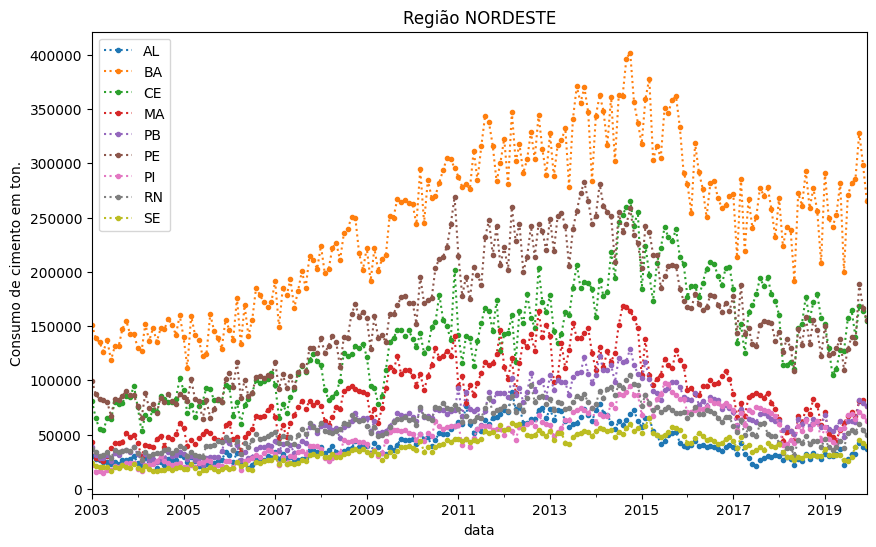

In [24]:
plt.figure(figsize=(10,6))

for i in df[df["regiao"] == NE]['estados'].unique():
    
    df[df['estados'] == i]['consumo'].plot(marker=".", linestyle=':')
    
plt.legend(df[df["regiao"] == NE]['estados'].unique())

plt.title(f"Região {NE}")
plt.ylabel("Consumo de cimento em ton.")
plt.xlabel("data")

plt.show()

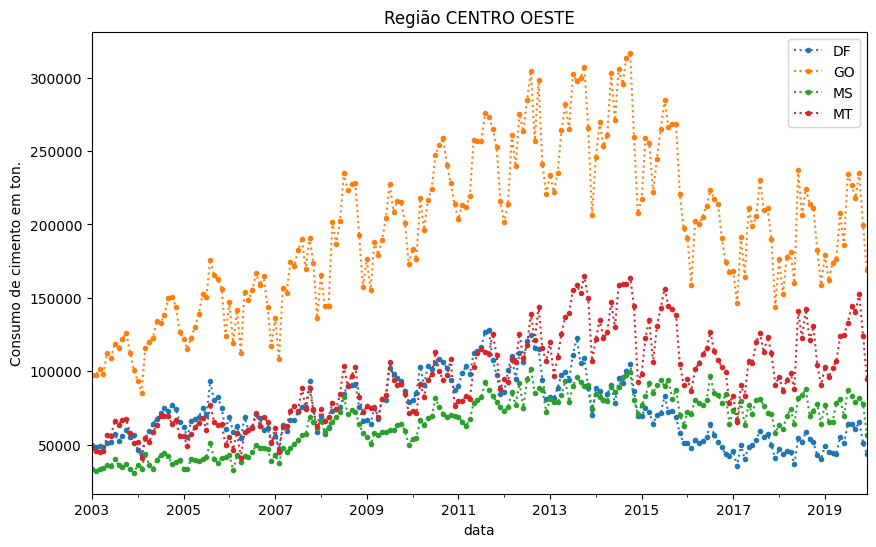

In [19]:
plt.figure(figsize=(10,6))

for i in df[df["regiao"] == CO]['estados'].unique():
    
    df[df['estados'] == i]['consumo'].plot(marker=".", linestyle=':')
    
plt.legend(df[df["regiao"] == CO]['estados'].unique())

plt.title(f"Região {CO}")
plt.ylabel("Consumo de cimento em ton.")
plt.xlabel("data")

plt.show()

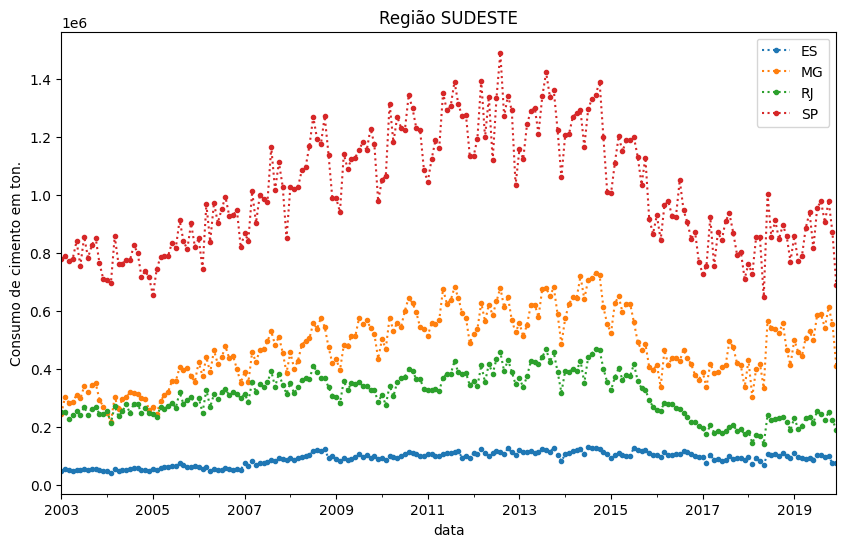

In [22]:
plt.figure(figsize=(10,6))

for i in df[df["regiao"] == SE]['estados'].unique():
    
    df[df['estados'] == i]['consumo'].plot(marker=".", linestyle=':')
    
plt.legend(df[df["regiao"] == SE]['estados'].unique())

plt.title(f"Região {SE}")
plt.ylabel("Consumo de cimento em ton.")
plt.xlabel("data")

plt.show()

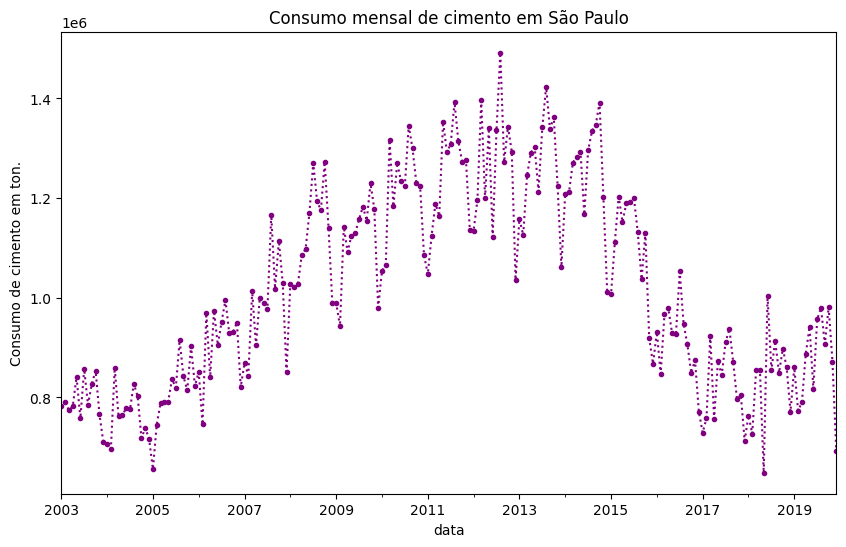

In [240]:
plt.figure(figsize=(10,6))

ax = df[df['estados'] == 'SP']['consumo'].plot(marker=".", linestyle=':', color='purple')
    
plt.title(f"Consumo mensal de cimento em São Paulo")
plt.ylabel("Consumo de cimento em ton.")
plt.xlabel("data")

plt.show()

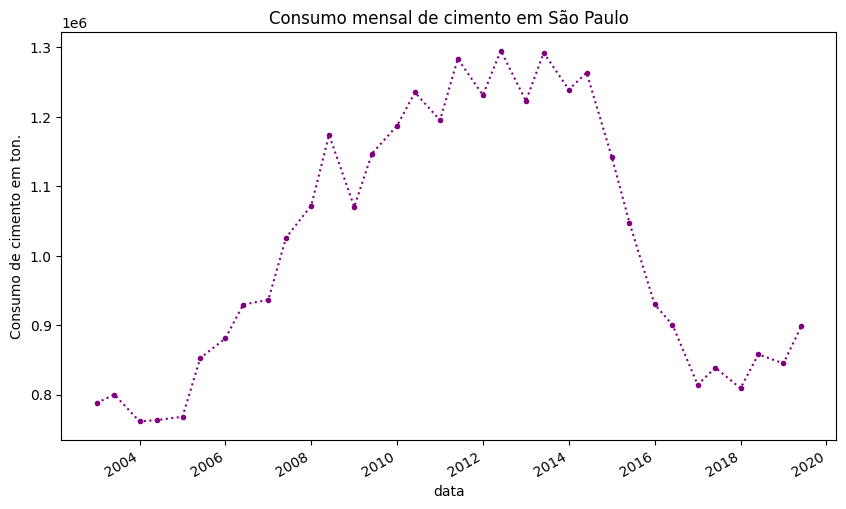

In [241]:
plt.figure(figsize=(10,6))

ax = y_semest[y_semest['estados'] == 'SP']['consumo'].plot(marker=".", linestyle=':', color='purple')
    
plt.title(f"Consumo mensal de cimento em São Paulo")
plt.ylabel("Consumo de cimento em ton.")
plt.xlabel("data")

plt.show()

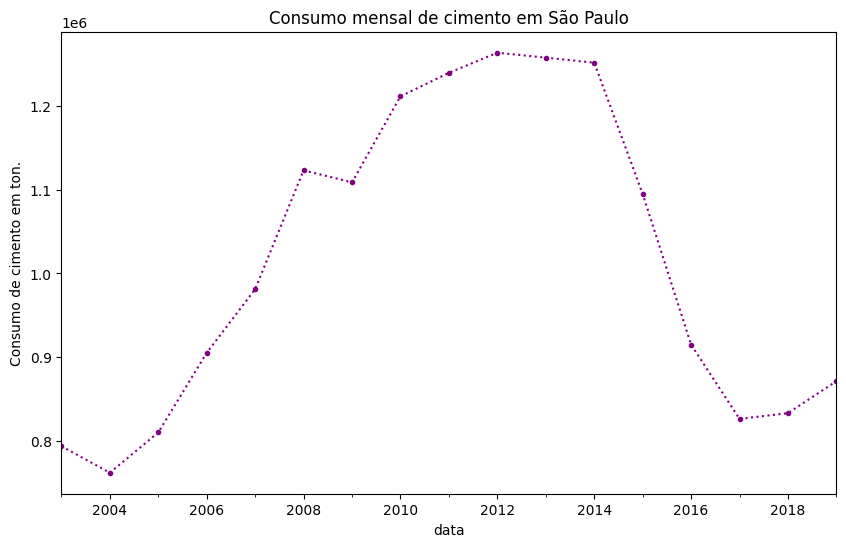

In [242]:
plt.figure(figsize=(10,6))

ax = y_anual[y_anual['estados'] == 'SP']['consumo'].plot(marker=".", linestyle=':', color='purple')
    
plt.title(f"Consumo mensal de cimento em São Paulo")
plt.ylabel("Consumo de cimento em ton.")
plt.xlabel("data")

plt.show()

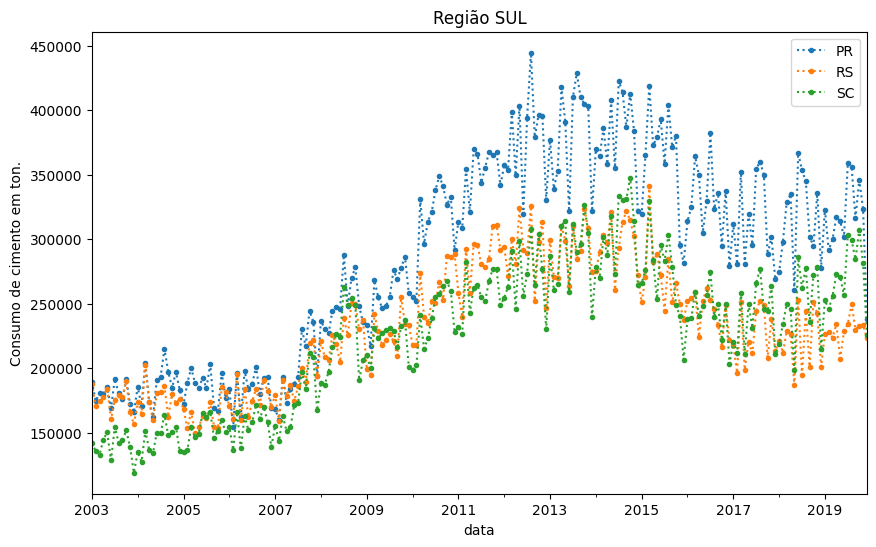

In [23]:
plt.figure(figsize=(10,6))

for i in df[df["regiao"] == S]['estados'].unique():
    
    df[df['estados'] == i]['consumo'].plot(marker=".", linestyle=':')
    
plt.legend(df[df["regiao"] == S]['estados'].unique())

plt.title(f"Região {S}")
plt.ylabel("Consumo de cimento em ton.")
plt.xlabel("data")

plt.show()

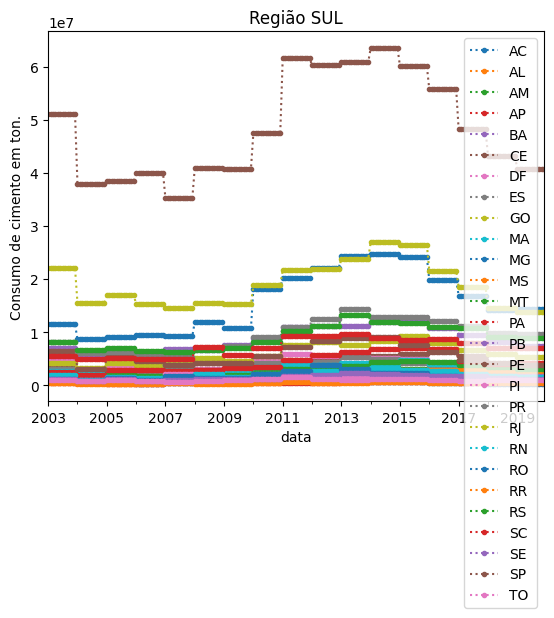

In [257]:
for i in df['estados'].unique()[:-15]:
    
    df[df['estados'] == i]['pib_cc'].plot(marker=".", linestyle=':')
    
plt.legend(df['estados'].unique())

plt.title(f"Região {S}")
plt.ylabel("Consumo de cimento em ton.")
plt.xlabel("data")

plt.show()

In [208]:
y = df.copy().reset_index()
y_semest = pd.DataFrame(columns=["estados", "data", "consumo"])

for year in range(2003,2020):
    
    for s in SIGLAS:
        
        y_semest.loc[len(y_semest)]=[s, pd.to_datetime(f"01{year}", format="%m%Y"), y.loc[(y["estados"] == s) & (y["data"].dt.year == year) & (y["data"].dt.month <= 6), "consumo"].mean()]
        y_semest.loc[len(y_semest)]=[s, pd.to_datetime(f"06{year}", format="%m%Y"), y.loc[(y["estados"] == s) & (y["data"].dt.year == year) & (y["data"].dt.month > 6), "consumo"].mean()]
        
y_semest=y_semest.sort_values(["data","estados"]).set_index('data')

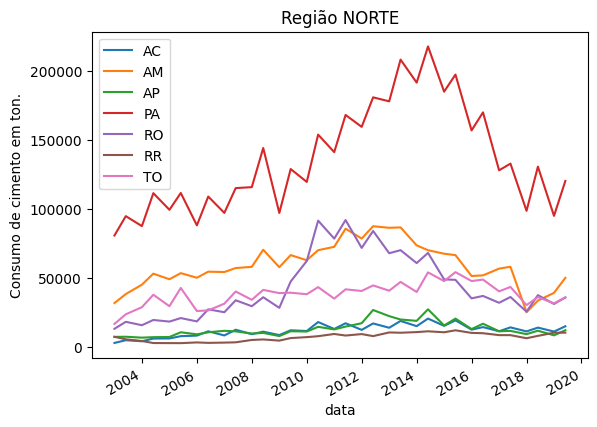

In [210]:
for i in df[df["regiao"] == N]['estados'].unique():
    
    y_semest[y_semest['estados'] == i]['consumo'].plot()
    
plt.legend(df[df["regiao"] == N]['estados'].unique())

plt.title(f"Região {N}")
plt.ylabel("Consumo de cimento em ton.")
plt.xlabel("data")

plt.show()

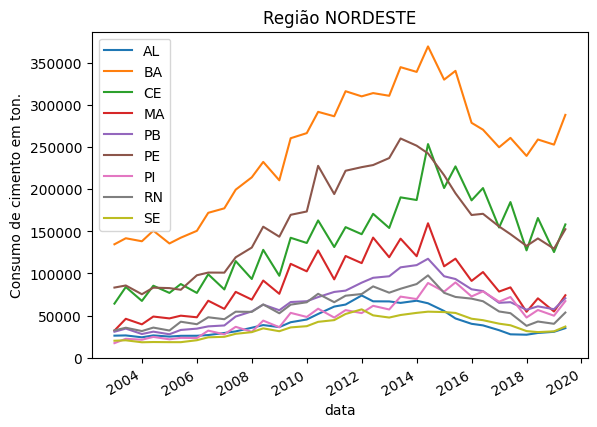

In [211]:
for i in df[df["regiao"] == NE]['estados'].unique():
    
    y_semest[y_semest['estados'] == i]['consumo'].plot()
    
plt.legend(df[df["regiao"] == NE]['estados'].unique())

plt.title(f"Região {NE}")
plt.ylabel("Consumo de cimento em ton.")
plt.xlabel("data")

plt.show()

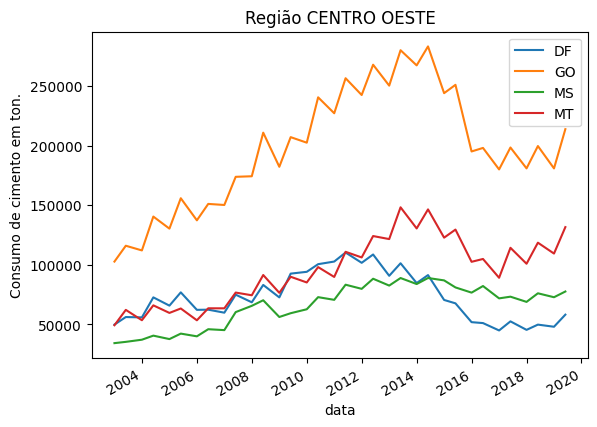

In [212]:
for i in df[df["regiao"] == CO]['estados'].unique():
    
    y_semest[y_semest['estados'] == i]['consumo'].plot()
    
plt.legend(df[df["regiao"] == CO]['estados'].unique())

plt.title(f"Região {CO}")
plt.ylabel("Consumo de cimento em ton.")
plt.xlabel("data")

plt.show()

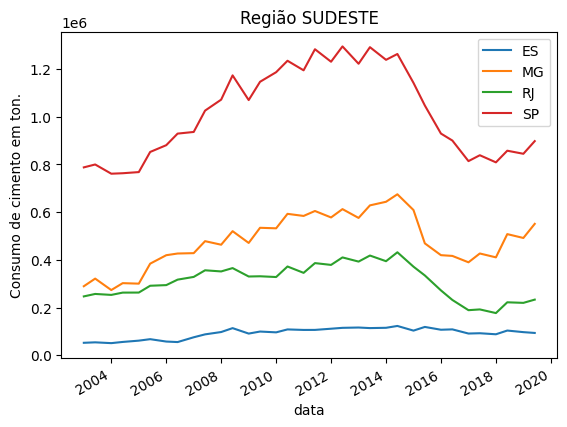

In [213]:
for i in df[df["regiao"] == SE]['estados'].unique():
    
    y_semest[y_semest['estados'] == i]['consumo'].plot()
    
plt.legend(df[df["regiao"] == SE]['estados'].unique())

plt.title(f"Região {SE}")
plt.ylabel("Consumo de cimento em ton.")
plt.xlabel("data")

plt.show()

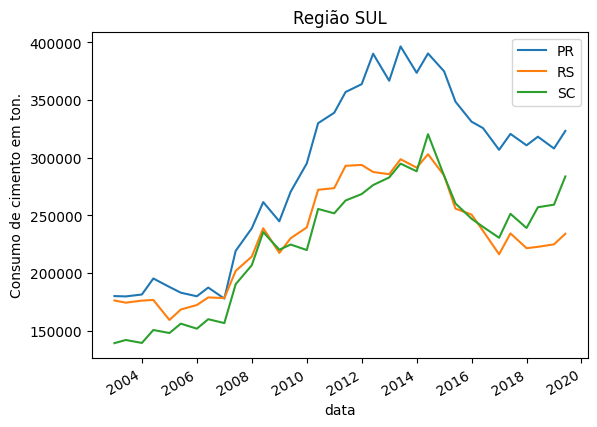

In [214]:
for i in df[df["regiao"] == S]['estados'].unique():
    
    y_semest[y_semest['estados'] == i]['consumo'].plot()
    
plt.legend(df[df["regiao"] == S]['estados'].unique())

plt.title(f"Região {S}")
plt.ylabel("Consumo de cimento em ton.")
plt.xlabel("data")

plt.show()

In [215]:
y = df.copy().reset_index()
y_anual = pd.DataFrame(columns=["estados", "data", "consumo"])

for year in range(2003,2020):
    
    for s in SIGLAS:
        
        y_anual.loc[len(y_anual)]=[s, pd.to_datetime(f"01{year}", format="%m%Y"), y.loc[(y["estados"] == s) & (y["data"].dt.year == year), "consumo"].mean()]
        
y_anual=y_anual.sort_values(["data","estados"]).set_index('data')

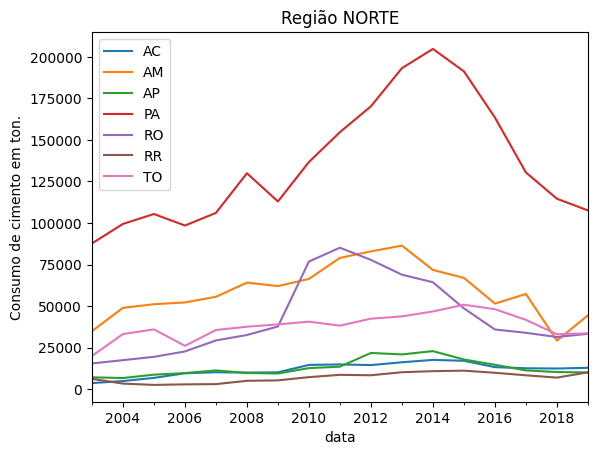

In [217]:
for i in df[df["regiao"] == N]['estados'].unique():
    
    y_anual[y_anual['estados'] == i]['consumo'].plot()
    
plt.legend(df[df["regiao"] == N]['estados'].unique())

plt.title(f"Região {N}")
plt.ylabel("Consumo de cimento em ton.")
plt.xlabel("data")

plt.show()

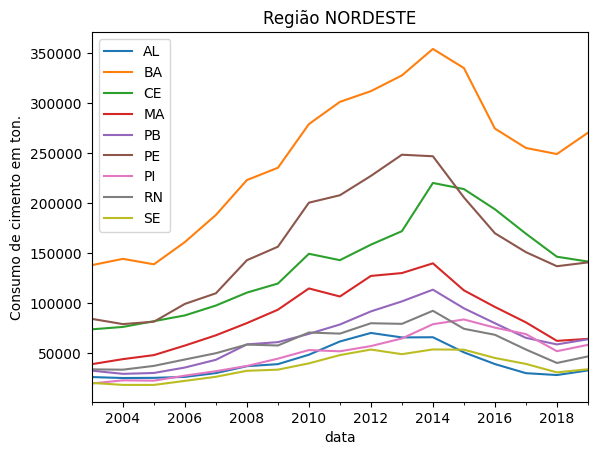

In [218]:
for i in df[df["regiao"] == NE]['estados'].unique():
    
    y_anual[y_anual['estados'] == i]['consumo'].plot()
    
plt.legend(df[df["regiao"] == NE]['estados'].unique())

plt.title(f"Região {NE}")
plt.ylabel("Consumo de cimento em ton.")
plt.xlabel("data")

plt.show()

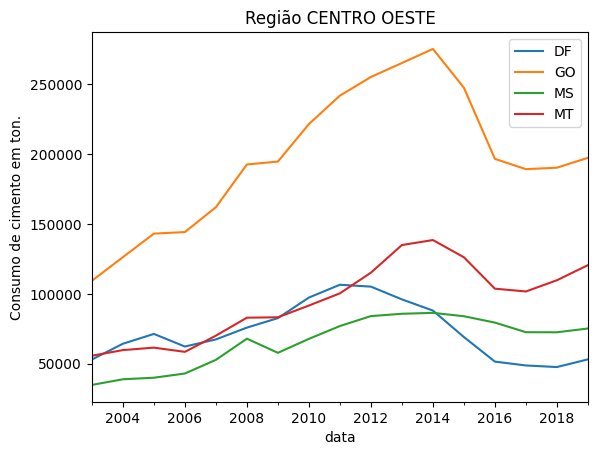

In [219]:
for i in df[df["regiao"] == CO]['estados'].unique():
    
    y_anual[y_anual['estados'] == i]['consumo'].plot()
    
plt.legend(df[df["regiao"] == CO]['estados'].unique())

plt.title(f"Região {CO}")
plt.ylabel("Consumo de cimento em ton.")
plt.xlabel("data")

plt.show()

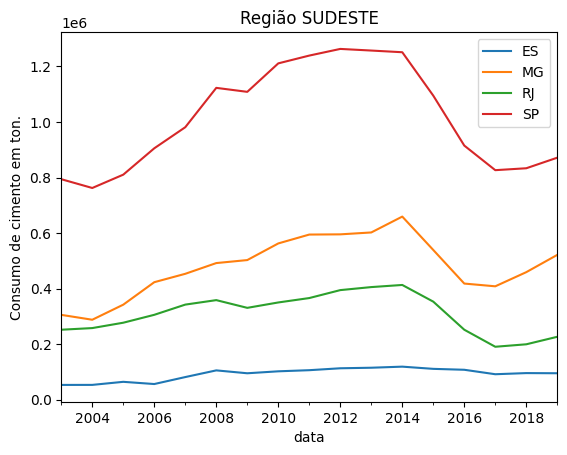

In [220]:
for i in df[df["regiao"] == SE]['estados'].unique():
    
    y_anual[y_anual['estados'] == i]['consumo'].plot()
    
plt.legend(df[df["regiao"] == SE]['estados'].unique())

plt.title(f"Região {SE}")
plt.ylabel("Consumo de cimento em ton.")
plt.xlabel("data")

plt.show()

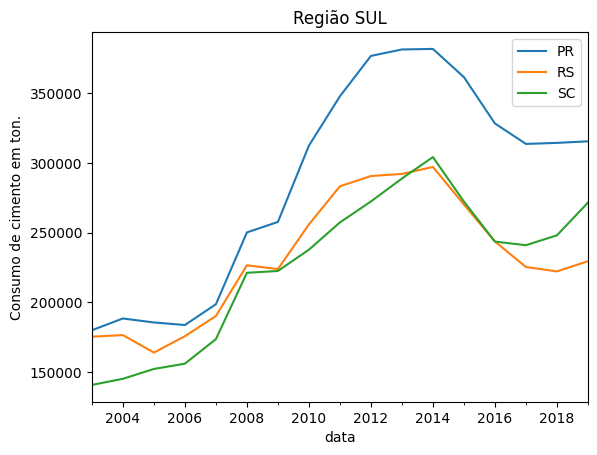

In [216]:
for i in df[df["regiao"] == S]['estados'].unique():
    
    y_anual[y_anual['estados'] == i]['consumo'].plot()
    
plt.legend(df[df["regiao"] == S]['estados'].unique())

plt.title(f"Região {S}")
plt.ylabel("Consumo de cimento em ton.")
plt.xlabel("data")

plt.show()

<AxesSubplot: xlabel='data'>

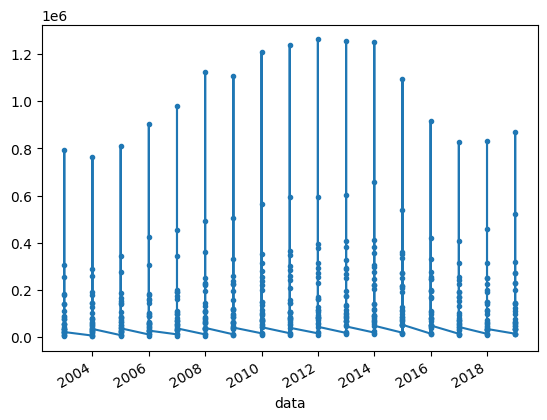

In [222]:
y_anual['consumo'].plot(marker='.')

In [228]:
y = df.copy().reset_index()
y_geral = pd.DataFrame(columns=["data", "consumo"])

for year in range(2003,2020):
    
    y_geral.loc[len(y_geral)]=[pd.to_datetime(f"01{year}", format="%m%Y"), y.loc[y["data"].dt.year == year, "consumo"].sum()]

y_geral['data'] = y_geral['data'].dt.year
y_geral=y_geral.sort_values(["data"]).set_index('data')

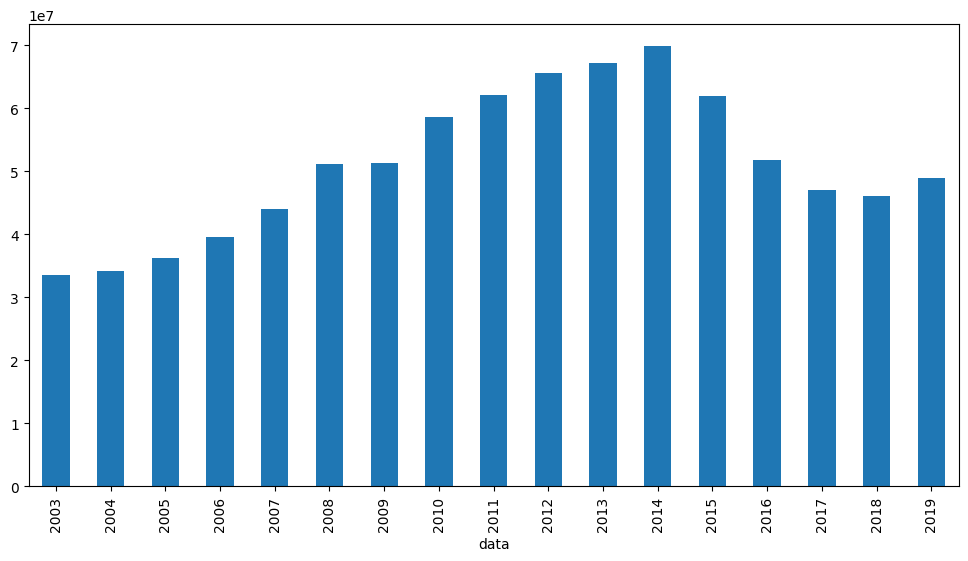

In [230]:
plt.figure(figsize=(12,6))
y_geral['consumo'].plot(kind='bar')

plt.show()

In [243]:
df[df['estados'] == 'SP']['consumo'].describe()

count       204.00
mean    1014669.88
std      201792.78
min      648867.00
25%      846445.25
50%      984987.00
75%     1189156.00
max     1491696.00
Name: consumo, dtype: float64

In [25]:
df[df['estados'] == 'RJ']['consumo'].describe()

count      204.00
mean    310152.89
std      75408.18
min     142706.00
25%     249041.00
50%     316239.50
75%     367035.75
max     470872.00
Name: consumo, dtype: float64

In [26]:
df[df['estados'] == 'MG']['consumo'].describe()

count      204.00
mean    480331.45
std     118425.46
min     219561.00
25%     397373.75
50%     481588.00
75%     568698.25
max     733113.00
Name: consumo, dtype: float64

In [27]:
df[df['estados'] == 'ES']['consumo'].describe()

count      204.00
mean     91905.06
std      23273.38
min      43597.00
25%      75113.50
50%      97714.50
75%     108942.75
max     130760.00
Name: consumo, dtype: float64